<a href="https://colab.research.google.com/github/OmdenaAI/philadelphia-climate-change-buildings/blob/main/src/tasks/task-2-EDA/task-2-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Importing Dependencies

- For more details on **missingno** libraray checkout this [Link](https://github.com/ResidentMario/missingno)

In [4]:
# Arrays and DataFrames
import numpy as np  # deals with arrays i-e matrices
import pandas as pd  # deals with tabular data

# Data Visualization
import matplotlib.pyplot as plt  # The most commonly used visualization library
import seaborn as sns  # it is Matplotlib under the hood. Handy for statistical plotting.
# It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline   
import missingno as mno  # Library to visualize missing values in a column - works well if the number of columns are below 50 

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [5]:
# opening train.csv using pandas and saving in DataFrame named 'train'
train = pd.read_csv('train.csv')

# printing the head i-e first 5 rows of the DataFrame 'train'
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [6]:
# printing the tail i-e last 5 rows of the DataFrame 'train'
train.tail()

Year_Factor State_Factor building_class         facility_type  \
75752            6     State_11     Commercial  Office_Uncategorized   
75753            6     State_11    Residential   5plus_Unit_Building   
75754            6     State_11     Commercial      Commercial_Other   
75755            6     State_11     Commercial      Commercial_Other   
75756            6     State_11    Residential    2to4_Unit_Building   

       floor_area  year_built  energy_star_rating  ELEVATION  \
75752     20410.0      1995.0                 8.0       36.6   
75753     40489.0      1910.0                98.0       36.6   
75754     28072.0      1917.0                 NaN       36.6   
75755     53575.0      2012.0                 NaN       36.6   
75756     23888.0      1974.0                51.0       36.6   

       january_min_temp  january_avg_temp  ...  days_above_80F  \
75752                28         43.451613  ...              25   
75753                28         43.451613  ...              25   
75754                26         36.612903  ...               6   
75755                26         36.612903  ...               6   
75756                27         36.935484  ...              16   

       days_above_90F  days_above_100F  days_above_110F  \
75752               3                0                0   
75753               3                0                0   
75754               0                0                0   
75755               0                0                0   
75756               0                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
75752                       NaN                        NaN             NaN   
75753                       NaN                        NaN             NaN   
75754                       NaN                        NaN             NaN   
75755                       NaN                        NaN             NaN   
75756                       NaN                        NaN             NaN   

       days_with_fog    site_eui     id  
75752            NaN  132.918411  75752  
75753            NaN   39.483672  75753  
75754            NaN   48.404398  75754  
75755            NaN  592.022750  75755  
75756            NaN   29.154684  75756  

[5 rows x 64 columns]

### Looking at shape of the data

In [7]:
# Lets look at the shape of the train and test DataFrames
print(f"No. of rows in train are {train.shape[0]} and No. of columns in train are {train.shape[1]}")

No. of rows in train are 75757 and No. of columns in train are 64


### Taking a look of dtype and null value distributions

In [8]:
# Lets see the dtypes and null value distributions of all columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

___
**Notes**
- As you can see that there are 3 object columns **'state_factor'**, **'building_class'**, and **'facility_type'**--- These are categorical variables and would have to be encoded after some analysis
- There are **24 float** columns and **37 integer** columns 
- There are several columns with Non-Null count of less than 75757 i-e *(total number of rows in tarin)* --- we need to impute the values using a reasonable startegy so that we dont lose data and keep the variance, bias and complexity of our model in check.
___

### Descriptive Statistics

In [9]:
# Lets look at descriptive statistics for the train DataFrame
# I am taking a transpose of describe() function so that it flips rows with columns
# .style shows all the rows of DataFrame
train.describe().T.style    

___
## Notes
- ```Year_Factor:``` we need to convert this into category type and later encode it using OneHotEncoding because these are annonymized years and we cannot create a timeseries out of it because we dont know which year comes first which comes later, currently it is label encoded and the ```Year_Factor =6``` will have more weightage than `Year_Factor = 1`
- ```Year_Built:``` there is a ```0``` value in year built we need to replace it with ```NaN```
- `direction_max_wind_speed:` if you see that `min`, `25 percentile`, `50 percentile`, `75 percentile` values are 1 and `max` value is 360, this tells us that more than 75 percentile values are 1 that means this column is not brining a lot of variability and possibly can be dropped.
- `direction_peak_wind_speed:` if you see that `min`, `25 percentile`, `50 percentile`, `75 percentile` values are 1 and `max` value is 360, this tells us that more than 75 percentile values are 1 that means this column is not brining a lot of variability and possibly can be dropped.
- `days_with_fog:` we would assume that the days when there is no fog have `NaN` values and can be replaced with `0` and that would take care of the missing values in this column
- `id:` its safe to say that `id` column can be dropped or can be set as index
___

### Converting `Year_Factor` into object

In [10]:
# Converting Year_Factor into a category type
train['Year_Factor'] = train['Year_Factor'].astype('str')
# train['State_Factor'] = train['State_Factor'].astype('str')
# train['building_class'] = train['building_class'].astype('str')
# train['facility_type'] = train['facility_type'].astype('str')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  object 
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [12]:
train.describe(include=['object']).T.style    

___
### Fixing `Year_Built` column

In [13]:
train['year_built'].replace(0, np.NaN, inplace=True)

In [14]:
# Lets look at the descriptive statistics again
train.describe().T.style

In [15]:
# % of null values
null_columns = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = train[train.columns[train.isnull().any()]].isnull().sum()
null_columns

Percentage of NaN values  Total NaN Values
year_built                                 2.432778              1843
energy_star_rating                        35.256148             26709
direction_max_wind_speed                  54.228652             41082
direction_peak_wind_speed                 55.190939             41811
max_wind_speed                            54.228652             41082
days_with_fog                             60.451179             45796

___
## Dropping the rows where year_built is missing
- Since there are only 2.4% values missing and we have a huge dataset so dropping `1843` values would not make a difference

In [16]:
train.dropna(subset=['year_built'], inplace=True)
train.shape

(73914, 64)

In [17]:
# Update the null columns
null_columns = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = train[train.columns[train.isnull().any()]].isnull().sum()
null_columns

Percentage of NaN values  Total NaN Values
energy_star_rating                        34.465730             25475
direction_max_wind_speed                  54.114241             39998
direction_peak_wind_speed                 55.066699             40702
max_wind_speed                            54.114241             39998
days_with_fog                             60.225397             44515

In [18]:
# Lets extract list of 
null_cols = null_columns.index.tolist()
print(type(null_cols))
null_cols

<class 'list'>


['energy_star_rating',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog']

### Visualizing null columns

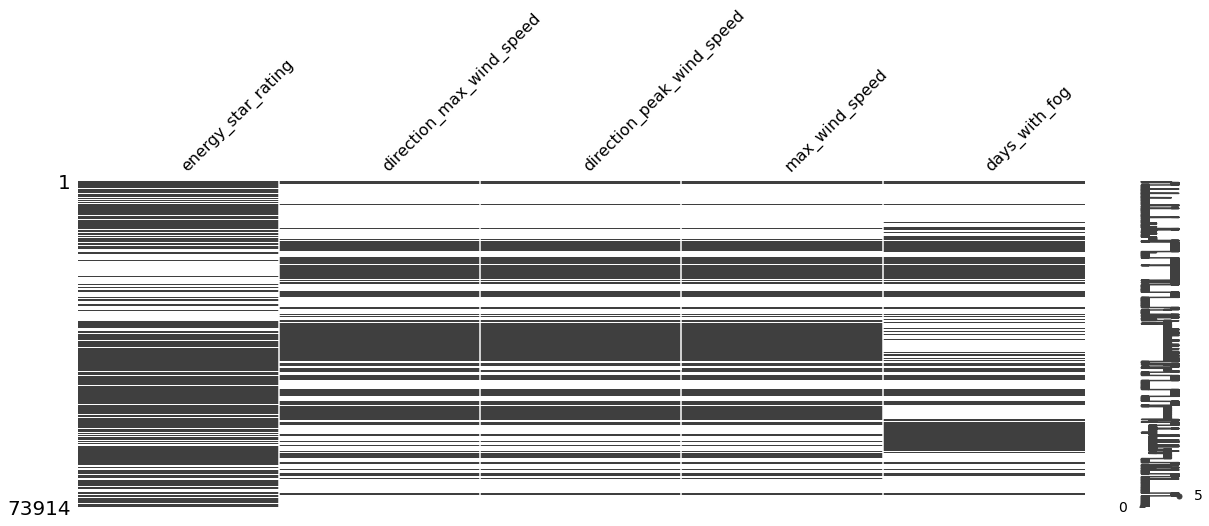

In [19]:
# Visual representation of columns with missing values
import missingno as mno
mno.matrix(train[null_cols], figsize = (20, 6))
plt.show()

## Converting `year_built` into `age` variable

In [20]:
# Age of building 
def age(df):
    if type(df['year_built']) == float and pd.isna(df['year_built']):
        return 0
    else:
        return (2022 - df['year_built'])

In [21]:
# Create new features
train['age'] = train.apply(age, axis=1)
train.drop('year_built', axis = 1, inplace=True)

In [22]:
train.head()

Year_Factor State_Factor building_class  \
0           1      State_1     Commercial   
1           1      State_1     Commercial   
2           1      State_1     Commercial   
3           1      State_1     Commercial   
4           1      State_1     Commercial   

                               facility_type  floor_area  energy_star_rating  \
0               Grocery_store_or_food_market     61242.0                11.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0                45.0   
2                       Retail_Enclosed_mall    280025.0                97.0   
3                  Education_Other_classroom     55325.0                46.0   
4                  Warehouse_Nonrefrigerated     66000.0               100.0   

   ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
0        2.4                36              50.5                68  ...   
1        1.8                36              50.5                68  ...   
2        1.8                36              50.5                68  ...   
3        1.8                36              50.5                68  ...   
4        2.4                36              50.5                68  ...   

   days_above_90F  days_above_100F  days_above_110F  direction_max_wind_speed  \
0               0                0                0                       1.0   
1               0                0                0                       1.0   
2               0                0                0                       1.0   
3               0                0                0                       1.0   
4               0                0                0                       1.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog    site_eui  id  \
0                        1.0             1.0            NaN  248.682615   0   
1                        NaN             1.0           12.0   26.500150   1   
2                        NaN             1.0           12.0   24.693619   2   
3                        NaN             1.0           12.0   48.406926   3   
4                        1.0             1.0            NaN    3.899395   4   

    age  
0  80.0  
1  67.0  
2  71.0  
3  42.0  
4  37.0  

[5 rows x 64 columns]

### Dropping `id` column

In [23]:
train.drop('id',axis = 1, inplace=True)

In [24]:
train.shape

(73914, 63)

# 2- Univariate Analysis of Categorical Variables

In [25]:
# just taking a sneak peak into several different facility_type in order to understand the distributions
train[train['facility_type']=='Education_College_or_university']

Year_Factor State_Factor building_class  \
29              1      State_1     Commercial   
32              1      State_1     Commercial   
182             1      State_1     Commercial   
192             1      State_1     Commercial   
204             1      State_1     Commercial   
...           ...          ...            ...   
74802           6     State_11     Commercial   
74803           6     State_11     Commercial   
74808           6     State_11     Commercial   
75164           6     State_11     Commercial   
75251           6     State_11     Commercial   

                         facility_type  floor_area  energy_star_rating  \
29     Education_College_or_university     99522.0                 NaN   
32     Education_College_or_university    115000.0                 NaN   
182    Education_College_or_university    147509.0                 NaN   
192    Education_College_or_university    114053.0                81.0   
204    Education_College_or_university    190066.0                 NaN   
...                                ...         ...                 ...   
74802  Education_College_or_university     58779.0                 NaN   
74803  Education_College_or_university    203030.0                 NaN   
74808  Education_College_or_university     68072.0                 NaN   
75164  Education_College_or_university    582447.0                 NaN   
75251  Education_College_or_university     26050.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
29          59.1                36         50.500000                68  ...   
32          59.1                36         50.500000                68  ...   
182         18.6                36         50.500000                68  ...   
192         18.6                36         50.500000                68  ...   
204         18.6                36         50.500000                68  ...   
...          ...               ...               ...               ...  ...   
74802       26.5                26         36.612903                48  ...   
74803       26.5                26         36.612903                48  ...   
74808       26.5                26         36.612903                48  ...   
75164       18.3                28         43.451613                56  ...   
75251       18.3                28         43.451613                56  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
29                 14               0                0                0   
32                 14               0                0                0   
182                14               0                0                0   
192                14               0                0                0   
204                14               0                0                0   
...               ...             ...              ...              ...   
74802               6               0                0                0   
74803               6               0                0                0   
74808               6               0                0                0   
75164              25               3                0                0   
75251              25               3                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
29                          NaN                        NaN             NaN   
32                          NaN                        NaN             NaN   
182                         NaN                        NaN             NaN   
192                         NaN                        NaN             NaN   
204                         NaN                        NaN             NaN   
...                         ...                        ...             ...   
74802                       NaN                        NaN             NaN   
74803                       NaN                       

In [26]:
train[train['floor_area']>2500000]

Year_Factor State_Factor building_class  \
5853            3      State_2     Commercial   
6931            4      State_2     Commercial   
8411            5      State_2     Commercial   
8419            5      State_2     Commercial   
9122            6      State_2     Commercial   
...           ...          ...            ...   
63888           6      State_6     Commercial   
64696           6      State_6     Commercial   
65900           3      State_8     Commercial   
66710           4      State_8     Commercial   
68585           6      State_8     Commercial   

                         facility_type  floor_area  energy_star_rating  \
5853   Education_College_or_university   3015594.0                 NaN   
6931   Education_College_or_university   5634890.0                 NaN   
8411   Education_College_or_university   5634890.0                 NaN   
8419   Education_College_or_university   3276489.0                 NaN   
9122                        Industrial   4101020.0                90.0   
...                                ...         ...                 ...   
63888  Education_College_or_university   2904696.0                 NaN   
64696             Office_Uncategorized   3636683.0                77.0   
65900            Health_Care_Inpatient   6353396.0                 NaN   
66710            Health_Care_Inpatient   6353396.0                 NaN   
68585            Health_Care_Inpatient   6353396.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
5853         3.0                15         37.500000                69  ...   
6931       100.6                 3         28.290323                59  ...   
8411         3.0                 8         29.966667                49  ...   
8419         3.0                 8         29.966667                49  ...   
9122        56.1                11         32.000000                62  ...   
...          ...               ...               ...               ...  ...   
63888       25.0                11         34.451613                59  ...   
64696       25.0                11         34.451613                59  ...   
65900        3.0                 4         32.903226                67  ...   
66710       95.1                 3         29.258065                62  ...   
68585        3.0                10         29.709677                61  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
5853               97              20                0                0   
6931               93              17                0                0   
8411              113              22                0                0   
8419              113              22                0                0   
9122              109              38                0                0   
...               ...             ...              ...              ...   
63888              96              17                0                0   
64696              96              17                0                0   
65900              86              16                0                0   
66710              93              20                0                0   
68585             102              16                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
5853                        NaN                        NaN             NaN   
6931                        NaN                        NaN             NaN   
8411                        NaN                        NaN             NaN   
8419                        NaN                        NaN             NaN   
9122                        NaN                        NaN             NaN   
...                         ...                        ...             ...   
63888                       1.0                        1.0             1.0   
64696                       1.0                       

## Merging similar `facility_types`

In [27]:
# printing the column names of facility types in the train DataFrame
print(train['facility_type'].unique())

['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Public_Assembly_Drama_theater' 'Public_Assembly_Social_meeting'
 'Religious_worship' 'Mixed_Use_Commercial_and_Residential'
 'Office_Bank_or_other_financial' 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_Service_Other'
 'Public_Assembly_Movie_Theater' 'Food_Se

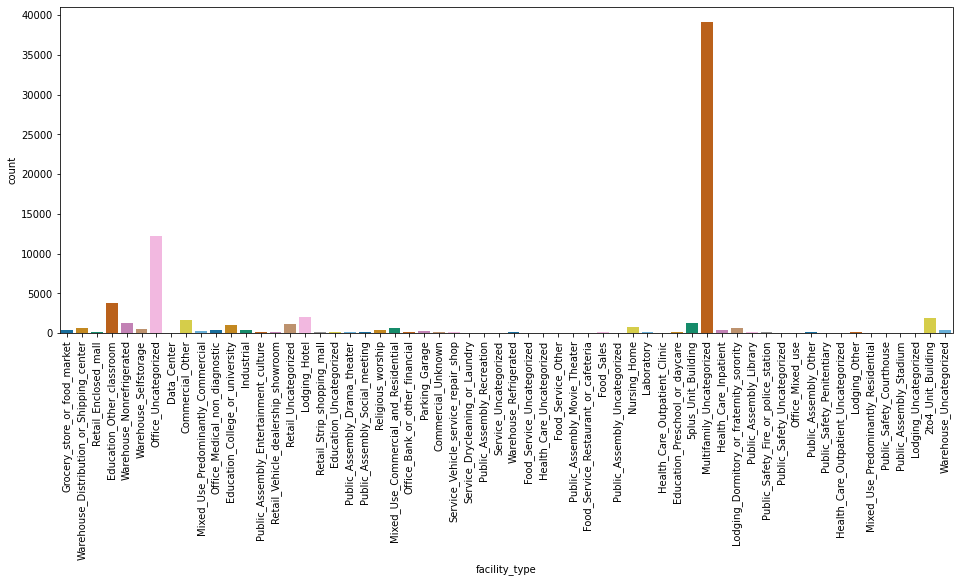

In [28]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['facility_type'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

In [29]:
# education = ['Education_College_or_university', 'Education_Uncategorized', 'Education_Preschool_or_daycare']
# healthcare = ['Health_Care_Inpatient', 'Health_Care_Uncategorized', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized']
# lodging = ['Lodging_Hotel', 'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Other', 'Lodging_Other']


In [30]:
# I am using str.contains to mask the rows that contain a specific string and then overwrite with the new value:
train.loc[train['facility_type'].str.contains('Lodging'), 'facility_type'] = 'lodging'
train.loc[train['facility_type'].str.contains('Education'), 'facility_type'] = 'education'
train.loc[train['facility_type'].str.contains('Health'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'public_safety'
train.loc[train['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'public_assembly'
train.loc[train['facility_type'].str.contains('Food', case = False), 'facility_type'] = 'food'
train.loc[train['facility_type'].str.contains('Retail'), 'facility_type'] = 'retail'
train.loc[train['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'warehouse'
train.loc[train['facility_type'].str.contains('Service'), 'facility_type'] = 'service'
train.loc[train['facility_type'].str.contains('Commercial'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Office'), 'facility_type'] = 'office'
train.loc[train['facility_type'].str.contains('Residential'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Building'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Lab'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Multifamily'), 'facility_type'] = 'Multifamily'
train.loc[train['facility_type'].str.contains('Data'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('service'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Parking'), 'facility_type'] = 'commercial'

In [31]:
print(train['facility_type'].nunique())

14


In [32]:
print(train['facility_type'].unique())

['food' 'warehouse' 'retail' 'education' 'office' 'commercial'
 'Industrial' 'public_assembly' 'lodging' 'Religious_worship' 'healthcare'
 'Nursing_Home' 'Multifamily' 'public_safety']


In [33]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count.index, norm_count, order = norm_count.index)
    plt.ylabel('fraction/percent', fontsize = 20)
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.xticks(rotation="vertical")
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

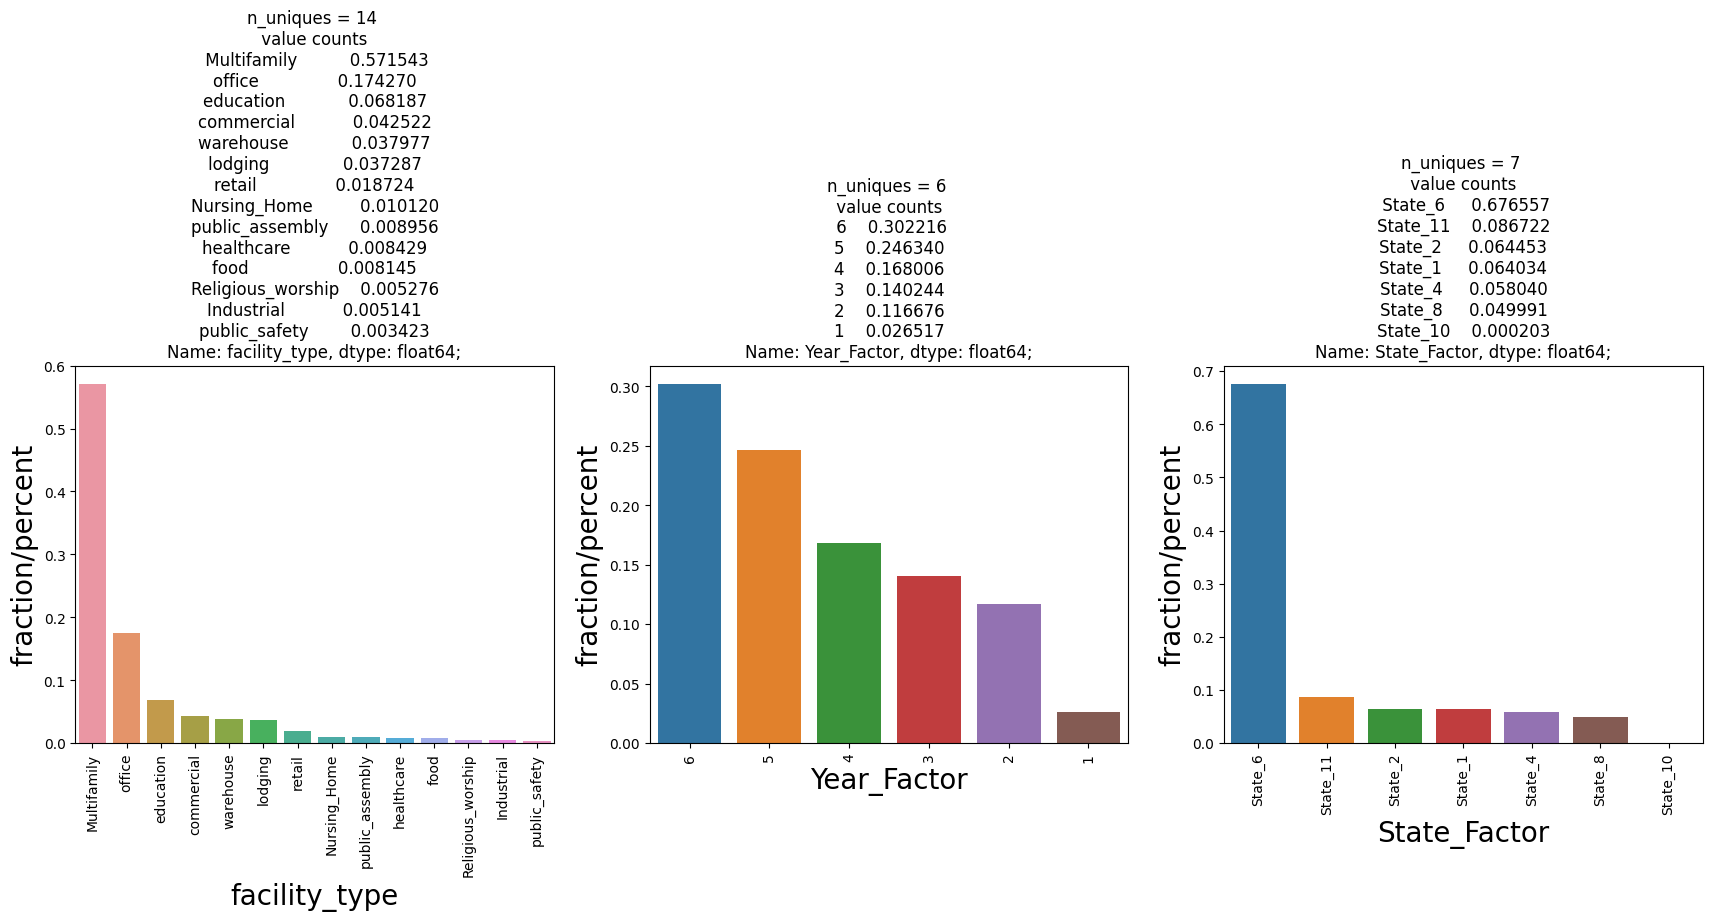

In [34]:
UVA_category(train, ['facility_type', 'Year_Factor', 'State_Factor'])

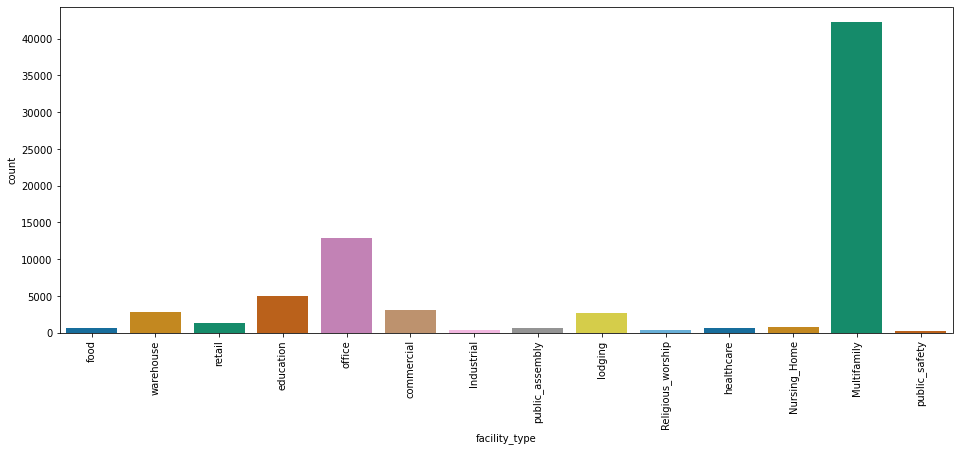

In [35]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['facility_type'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

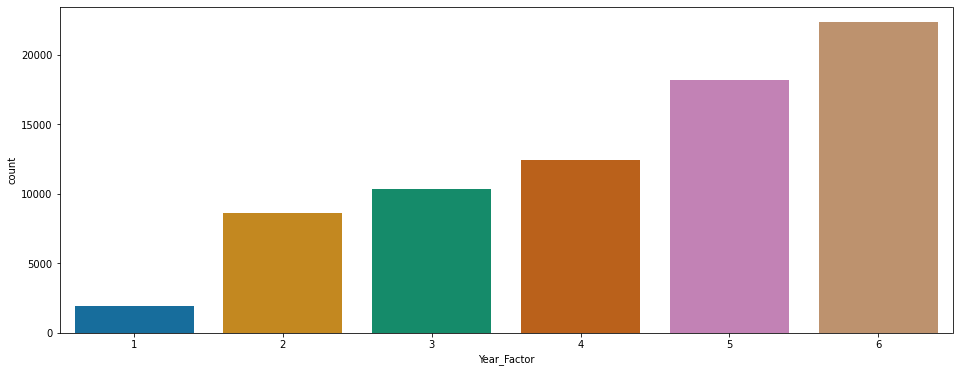

In [36]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['Year_Factor'], palette = "colorblind")
plt.xticks()
plt.show()

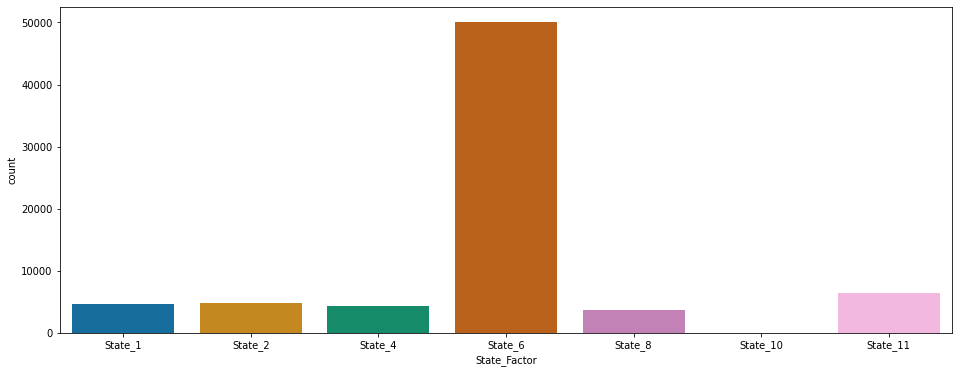

In [37]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['State_Factor'], palette = "colorblind")
plt.xticks()
plt.show()

In [38]:
train[train['State_Factor']=='State_10']

Year_Factor State_Factor building_class facility_type  floor_area  \
69330           3     State_10     Commercial    commercial    527731.0   
69331           3     State_10     Commercial        office    213067.0   
69332           3     State_10     Commercial        office    335991.0   
69333           4     State_10     Commercial        office    394087.0   
69334           4     State_10     Commercial        office    213067.0   
69335           4     State_10     Commercial        office    335991.0   
69336           4     State_10     Commercial        office    151599.0   
69337           5     State_10     Commercial        office    394087.0   
69338           5     State_10     Commercial        office    213067.0   
69339           5     State_10     Commercial        office    335991.0   
69340           5     State_10     Commercial        office    151599.0   
69341           6     State_10     Commercial        office    394087.0   
69342           6     State_10     Commercial        office    213067.0   
69343           6     State_10     Commercial        office    335991.0   
69344           6     State_10     Commercial        office    151599.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
69330                 NaN        3.0                15         40.274194   
69331                83.0        3.0                15         40.274194   
69332                82.0        3.0                15         40.274194   
69333                 NaN      413.9                 6         32.241935   
69334                86.0      413.9                 6         32.241935   
69335                83.0      413.9                 6         32.241935   
69336                74.0      413.9                 6         32.241935   
69337                 NaN        3.0                12         35.596774   
69338                88.0        3.0                12         35.596774   
69339                83.0        3.0                12         35.596774   
69340                86.0        3.0                12         35.596774   
69341                91.0        3.0                15         34.935484   
69342                87.0        3.0                15         34.935484   
69343                81.0        3.0                15         34.935484   
69344                87.0        3.0                15         34.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
69330                72  ...             112              27                0   
69331                72  ...             112              27                0   
69332                72  ...             112              27                0   
69333                61  ...             113              20                0   
69334                61  ...             113              20                0   
69335                61  ...             113              20                0   
69336                61  ...             113              20                0   
69337                67  ...             126              41                0   
69338                67  ...             126              41                0   
69339                67  ...             126              41                0   
69340                67  ...             126              41                0   
69341                62  ...             123              52                1   
69342                62  ...             123              52                1   
69343                62  ...             123              52                1   
69344                62  ...             123              52                1   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
69330                0                     350.0                      350.0   
69331                0                     350.0                      350.0   
69332                0                     350.0      

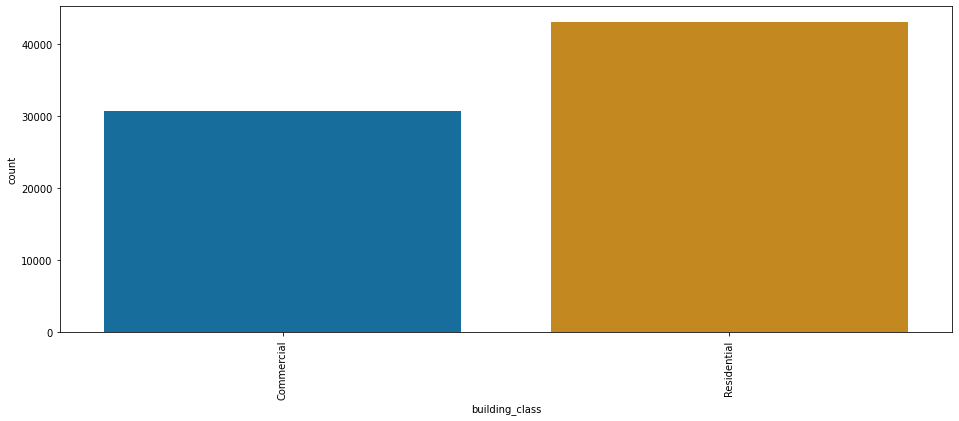

In [39]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['building_class'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

___
**Notes**

1. **Facility_type**
    - We grouped facility types and end up with 14 categories in total instead of 60 categories
    - There are 7 facility types which contribute less than 1%, maybe we can merge them together and make our categories abit smaller as these categories are not bringing much to the dataset, we will test this hypothesis at hypothesis testing state


2. **Year_Factor**
    - the yearly data is different for each year
    
    
3. **State_Factor**
    - About 67% of data is from state_6 and state_10 is contributing only 0.02% of the data and majority of the building are commercial and office type, we have to see if we can drop it because its just 15 rows out of 74k rows, statistically not a good representative of the state_10 in the whole data.
___

# **<span style="color:#0000FF;">3- Univariate Analysis of Numerical Variables</span>**

- You can read about `skewness` and `Kurtosis` in this link [Ref](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)
- Skewness is telling you about the symmetry of a curve, `normal distribution have a skewness of 0`, positive skewness means mean is greater than median, and negative means the other way around
- Kurtosis tells you about how heavy or light the tail of the curve is, `for normal distribution the kurtosis is 3`, kurtosis **bigger than 3** means tails are heavy, whereas kurtosis **less than 3** means tails are light

In [40]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    iqr = data[i].quantile(.75) - data[i].quantile(.25)

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}; iqr = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2),
                                                                                                   round(iqr,2)))

## **<span style="color:#0000FF;">3.1 Floor Area</span>**

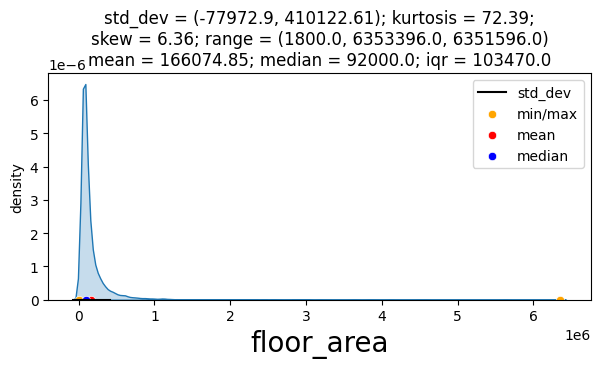

In [41]:
UVA_numeric(train, ['floor_area'])

In [42]:
# Checking for outlier using IQR method 
train[train['floor_area']>4.5*(train['floor_area'].quantile(.75) - train['floor_area'].quantile(.25))]

Year_Factor State_Factor building_class facility_type  floor_area  \
13              1      State_1     Commercial    commercial    616793.0   
56              1      State_1     Commercial        office   1011213.0   
87              1      State_1     Commercial       lodging    525313.0   
93              1      State_1     Commercial       lodging   1500000.0   
95              1      State_1     Commercial        office    937770.0   
...           ...          ...            ...           ...         ...   
74881           6     State_11     Commercial    healthcare    879000.0   
75164           6     State_11     Commercial     education    582447.0   
75434           6     State_11     Commercial    commercial    489872.0   
75476           6     State_11     Commercial        retail    530039.0   
75516           6     State_11    Residential    commercial    490053.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
13                   13.0        2.4                36         50.500000   
56                   70.0       59.1                36         50.500000   
87                   88.0      120.1                36         50.500000   
93                   78.0      120.1                36         50.500000   
95                   76.0      120.1                36         50.500000   
...                   ...        ...               ...               ...   
74881                10.0       26.5                28         43.451613   
75164                 NaN       18.3                28         43.451613   
75434                 NaN       18.3                28         43.451613   
75476                98.0      313.0                28         43.451613   
75516                 NaN      313.0                28         43.451613   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
13                   68  ...              14               0                0   
56                   68  ...              14               0                0   
87                   68  ...              14               0                0   
93                   68  ...              14               0                0   
95                   68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
74881                56  ...              25               3                0   
75164                56  ...              25               3                0   
75434                56  ...              25               3                0   
75476                56  ...              25               3                0   
75516                56  ...              25               3                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
13                   0                       1.0                        1.0   
56                   0                       NaN                        NaN   
87                   0                       NaN                        NaN   
93                   0                       NaN                        NaN   
95                   0                       NaN                        NaN   
...                ...                       ...                        ...   
74881                0                       NaN                        NaN   
75164                0                       NaN                        NaN   
75434                0                       NaN                        NaN   
75476                0                       NaN                        NaN   
75516                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui    age  
13                1.0            NaN  608.839519   67.0  
56                NaN            NaN  142.478168  102.0  
87                NaN            NaN   50.099352   39.0  
93                NaN            NaN  

In [43]:
train[train['floor_area']>1500000]

Year_Factor State_Factor building_class facility_type  floor_area  \
201             1      State_1     Commercial        office   1895166.0   
245             1      State_1     Commercial        office   1978104.0   
546             2      State_1     Commercial        office   1978104.0   
600             2      State_1     Commercial        office   1948626.0   
602             2      State_1     Commercial        office   1895166.0   
...           ...          ...            ...           ...         ...   
73271           6     State_11     Commercial    healthcare   1926841.0   
73325           6     State_11     Commercial        office   1632820.0   
73574           6     State_11     Commercial        office   1592914.0   
73729           6     State_11     Commercial    healthcare   1765970.0   
73775           6     State_11     Commercial     education   2200000.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
201                  79.0       18.6                36         50.500000   
245                  70.0       45.7                36         50.500000   
546                  71.0        2.4                27         48.951613   
600                  93.0        2.4                27         48.951613   
602                  80.0        2.4                27         48.951613   
...                   ...        ...               ...               ...   
73271                29.0       26.5                28         43.451613   
73325                86.0       26.5                28         43.451613   
73574                97.0       26.5                28         43.451613   
73729                54.0       26.5                28         43.451613   
73775                 NaN       26.5                28         43.451613   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
201                  68  ...              14               0                0   
245                  68  ...              14               0                0   
546                  69  ...             113              35                1   
600                  69  ...             113              35                1   
602                  69  ...             113              35                1   
...                 ...  ...             ...             ...              ...   
73271                56  ...              25               3                0   
73325                56  ...              25               3                0   
73574                56  ...              25               3                0   
73729                56  ...              25               3                0   
73775                56  ...              25               3                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
201                  0                       NaN                        NaN   
245                  0                       NaN                        NaN   
546                  0                       1.0                        1.0   
600                  0                       1.0                        1.0   
602                  0                       1.0                        1.0   
...                ...                       ...                        ...   
73271                0                       NaN                        NaN   
73325                0                       NaN                        NaN   
73574                0                       NaN                        NaN   
73729                0                       NaN                        NaN   
73775                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui   age  
201               NaN            NaN   82.698561  43.0  
245               NaN            NaN   96.685615  53.0  
546               1.0           88.0   91.449454  53.0  
600               1.0           88.0   85.

In [44]:
floor_area_adjusted = train[train['floor_area']<1500000].copy()
floor_area_adjusted

Year_Factor State_Factor building_class facility_type  floor_area  \
0               1      State_1     Commercial          food     61242.0   
1               1      State_1     Commercial     warehouse    274000.0   
2               1      State_1     Commercial        retail    280025.0   
3               1      State_1     Commercial     education     55325.0   
4               1      State_1     Commercial     warehouse     66000.0   
...           ...          ...            ...           ...         ...   
75752           6     State_11     Commercial        office     20410.0   
75753           6     State_11    Residential   Multifamily     40489.0   
75754           6     State_11     Commercial    commercial     28072.0   
75755           6     State_11     Commercial    commercial     53575.0   
75756           6     State_11    Residential   Multifamily     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN                        NaN   
75755                0                       NaN                        NaN   
75756                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui    age  
0                 1.0            NaN  248.682615   80.0  
1                 1.0           12.0   26.500150   67.0  
2                 1.0           12.0   24.693619   71.0  
3                 1.0           12.0  

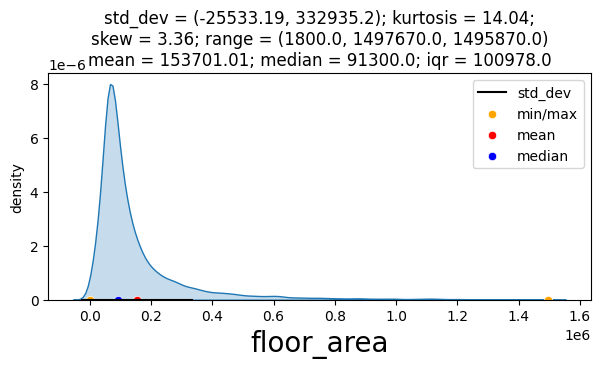

In [45]:
UVA_numeric(floor_area_adjusted, ['floor_area'])

In [46]:
# # Plotting the updated facility types
# plt.figure(figsize=(16,6))
# sns.countplot(df['State_Factor'], palette = "colorblind")
# plt.xticks()
# plt.show()

___
**Notes**

- Seems like all the buildings which are pretty big in terms of floor area are either `offices`, `universities`, or `hospitals`
- This suggests that these values are not outliers but considering our DataFrame we can see that there are only `459` rows, which if we drop the kutosis would come down to 14.04 from 72.39, skewness came down to 3.36 from 6.36
- Still in order to make it normally distributed we can do log normalization on the data (which we will do it later)
___

## **<span style="color:#0000FF;">3.2 Energy Star Rating --- and Elevation</span>**

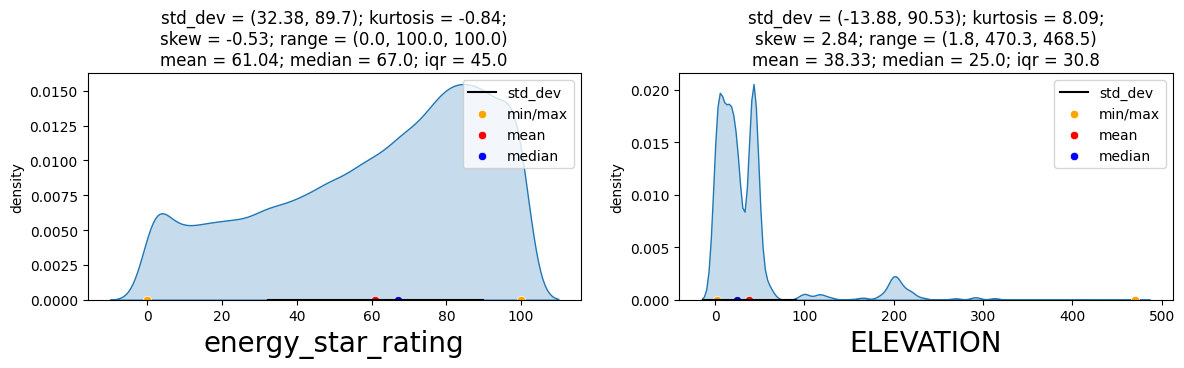

In [47]:
UVA_numeric(train, ['energy_star_rating', 'ELEVATION'])

___
**Notes**
- `Energy star rating` has alot of missing values when we impute those values we will see the distribution of it again and will fix it accordingly at that time
- `Elevation` is showing that there is kurtosis greater than 3 that means tails are heavy and skewness is positive, it tells us that possibly there are outliers in this variable

In [48]:
# Removing outliers using 3 std rule
elevation_adjusted = train[train['ELEVATION']< train['ELEVATION'].mean() + 2 * train['ELEVATION'].std()]
elevation_adjusted

Year_Factor State_Factor building_class facility_type  floor_area  \
0               1      State_1     Commercial          food     61242.0   
1               1      State_1     Commercial     warehouse    274000.0   
2               1      State_1     Commercial        retail    280025.0   
3               1      State_1     Commercial     education     55325.0   
4               1      State_1     Commercial     warehouse     66000.0   
...           ...          ...            ...           ...         ...   
75752           6     State_11     Commercial        office     20410.0   
75753           6     State_11    Residential   Multifamily     40489.0   
75754           6     State_11     Commercial    commercial     28072.0   
75755           6     State_11     Commercial    commercial     53575.0   
75756           6     State_11    Residential   Multifamily     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN                        NaN   
75755                0                       NaN                        NaN   
75756                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui    age  
0                 1.0            NaN  248.682615   80.0  
1                 1.0           12.0   26.500150   67.0  
2                 1.0           12.0   24.693619   71.0  
3                 1.0           12.0  

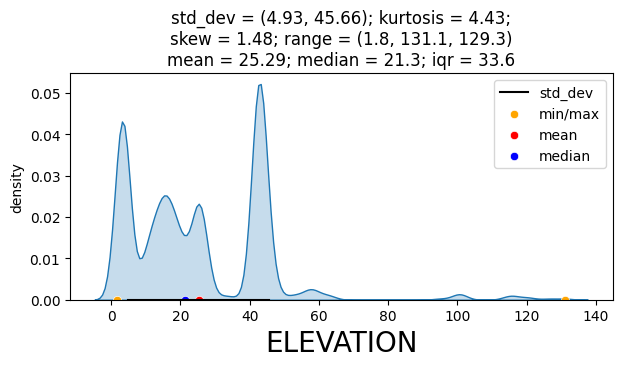

In [49]:
UVA_numeric(elevation_adjusted, ['ELEVATION'])

In [50]:
# Checking for outlier using IQR method 
elevation_iqr = train[train['ELEVATION']<3.5*(train['ELEVATION'].quantile(.75) - train['ELEVATION'].quantile(.25))]
elevation_iqr

Year_Factor State_Factor building_class facility_type  floor_area  \
0               1      State_1     Commercial          food     61242.0   
1               1      State_1     Commercial     warehouse    274000.0   
2               1      State_1     Commercial        retail    280025.0   
3               1      State_1     Commercial     education     55325.0   
4               1      State_1     Commercial     warehouse     66000.0   
...           ...          ...            ...           ...         ...   
75752           6     State_11     Commercial        office     20410.0   
75753           6     State_11    Residential   Multifamily     40489.0   
75754           6     State_11     Commercial    commercial     28072.0   
75755           6     State_11     Commercial    commercial     53575.0   
75756           6     State_11    Residential   Multifamily     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN                        NaN   
75755                0                       NaN                        NaN   
75756                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui    age  
0                 1.0            NaN  248.682615   80.0  
1                 1.0           12.0   26.500150   67.0  
2                 1.0           12.0   24.693619   71.0  
3                 1.0           12.0  

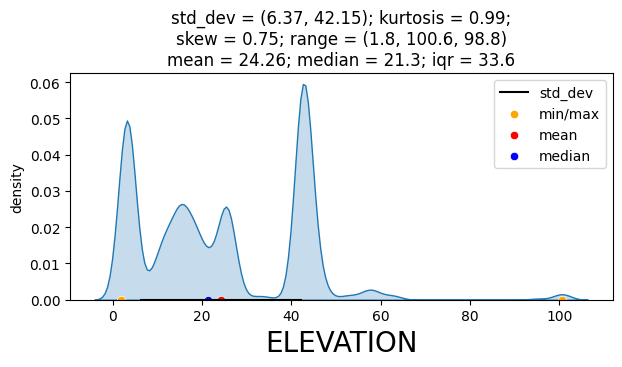

In [51]:
UVA_numeric(elevation_iqr, ['ELEVATION'])

___
**Notes**
- As we can see the Kurtosis and skewness of ELEVATION adjusts pretty well using IQR outlier detection method as compared to 3STD rule, but we would have to drop around 8k rows which is too much!
- Still the curve is multimodal, we have to try standardizing or normalizing these values to make it normally distributed
___

## **<span style="color:#0000FF;">3.3 January Temperatures</span>**

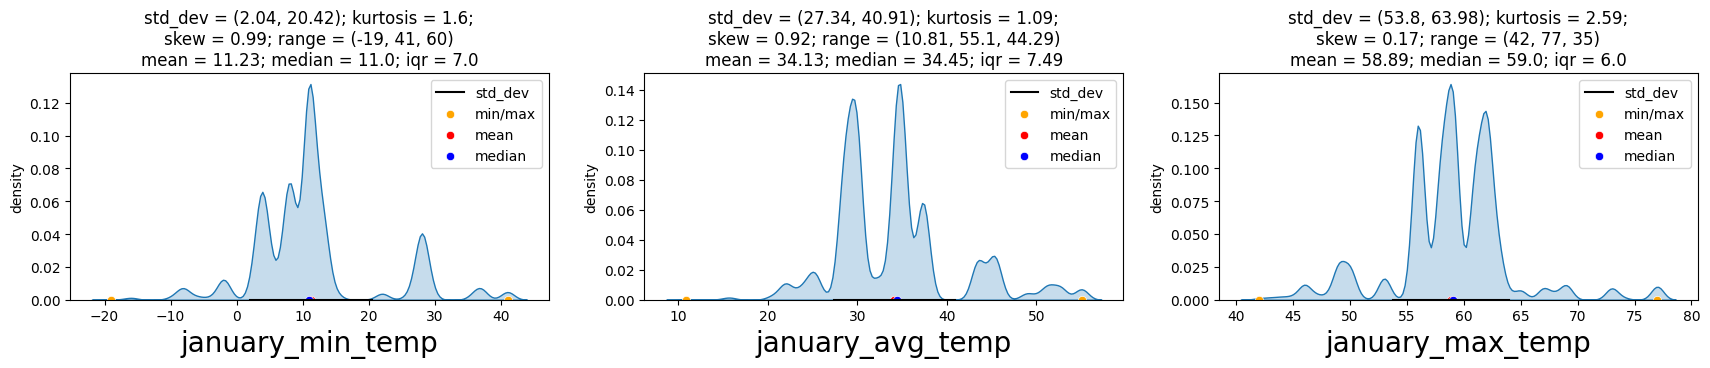

In [52]:
UVA_numeric(train, ['january_min_temp', 'january_avg_temp', 'january_max_temp'])

## **<span style="color:#0000FF;">3.4 February Temperatures</span>**

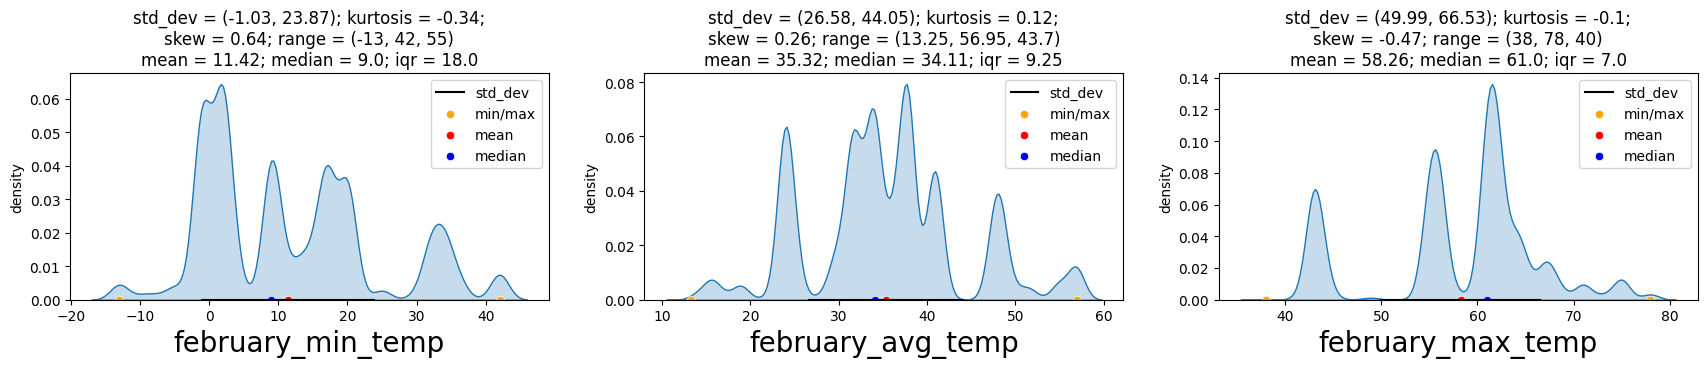

In [53]:
UVA_numeric(train, ['february_min_temp', 'february_avg_temp', 'february_max_temp'])

## **<span style="color:#0000FF;">3.5 March Temperatures</span>**

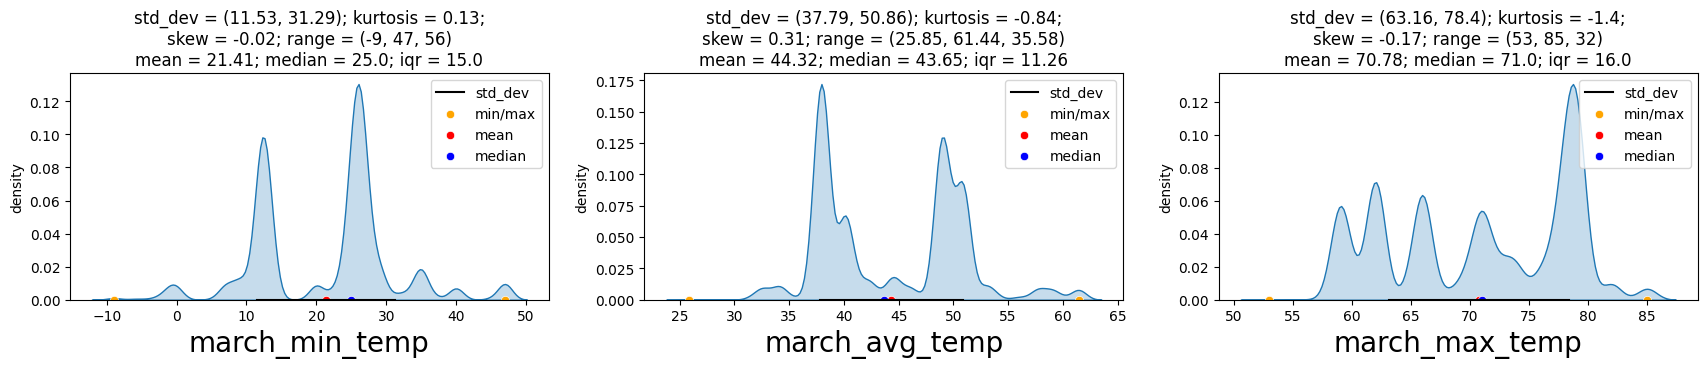

In [54]:
UVA_numeric(train, ['march_min_temp', 'march_avg_temp', 'march_max_temp'])

## **<span style="color:#0000FF;">3.6 April Temperatures</span>**

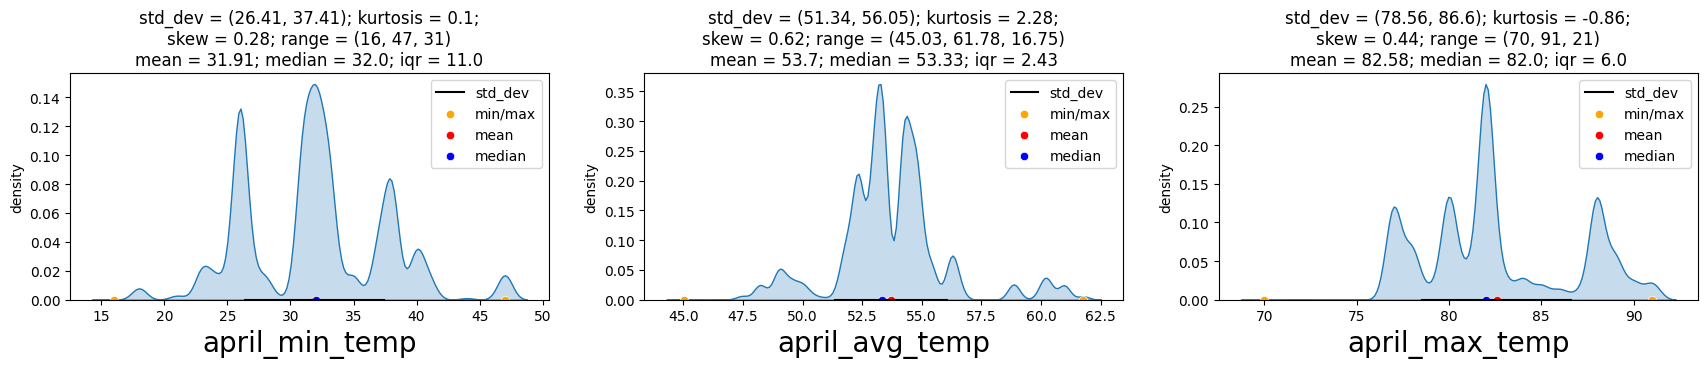

In [55]:
UVA_numeric(train, ['april_min_temp', 'april_avg_temp', 'april_max_temp'])

## **<span style="color:#0000FF;">3.7 May Temperatures</span>**

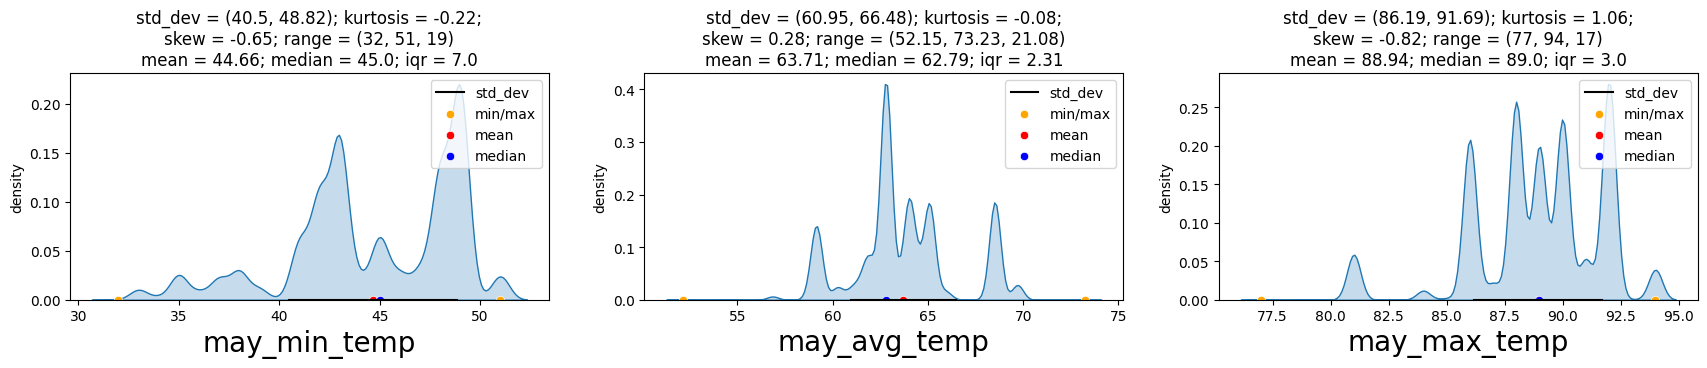

In [56]:
UVA_numeric(train, ['may_min_temp', 'may_avg_temp', 'may_max_temp'])

## **<span style="color:#0000FF;">3.8 June Temperatures</span>**

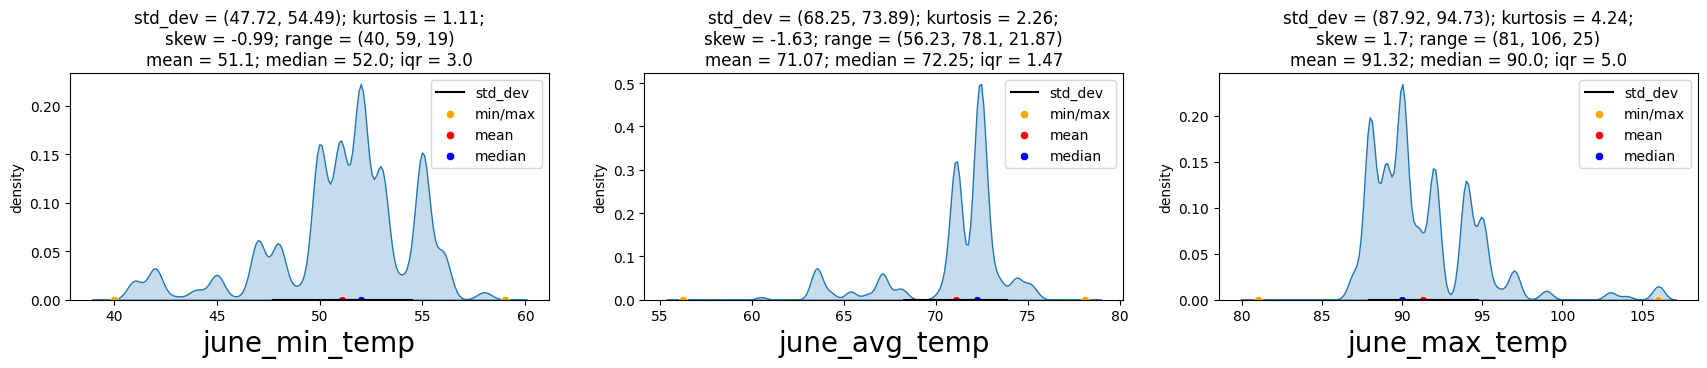

In [57]:
UVA_numeric(train, ['june_min_temp', 'june_avg_temp', 'june_max_temp'])

## **<span style="color:#0000FF;">3.9 July Temperatures</span>**

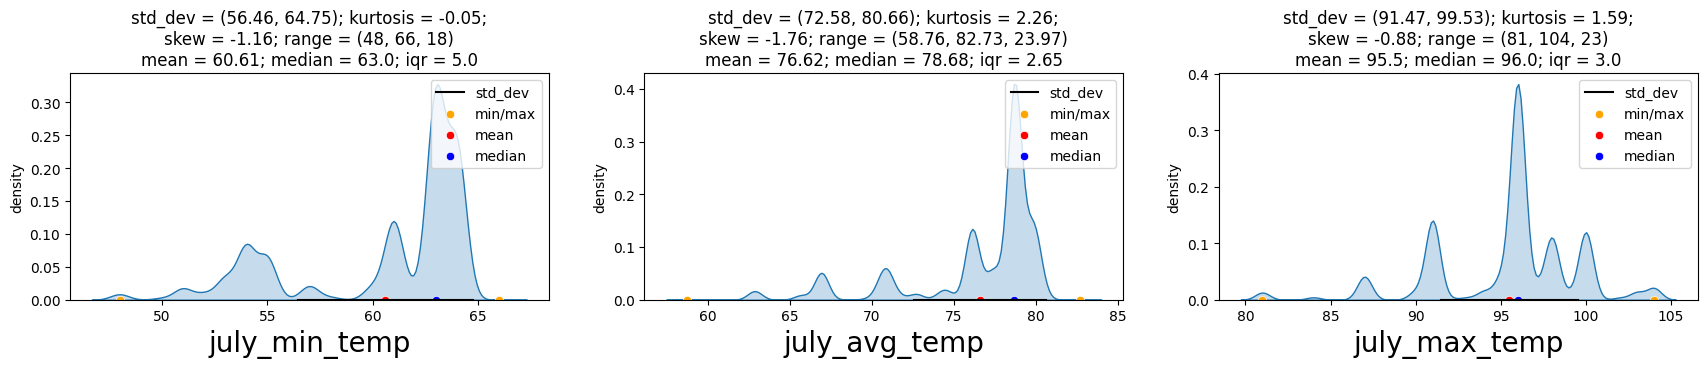

In [58]:
UVA_numeric(train, ['july_min_temp', 'july_avg_temp', 'july_max_temp'])

## **<span style="color:#0000FF;">3.10 August Temperatures</span>**

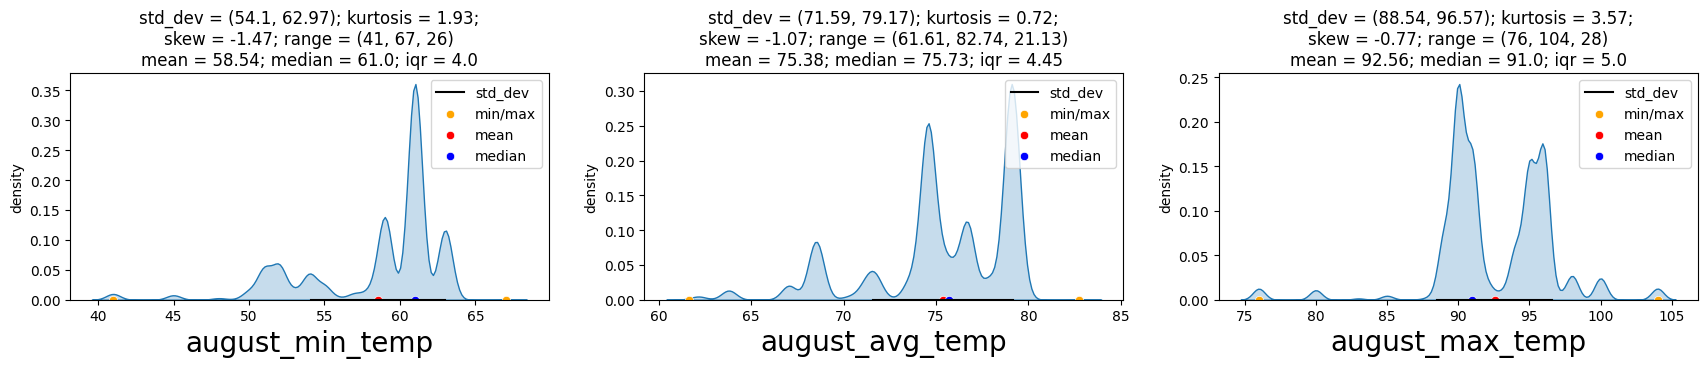

In [59]:
UVA_numeric(train, ['august_min_temp', 'august_avg_temp', 'august_max_temp'])

## **<span style="color:#0000FF;">3.11 September Temperatures</span>**

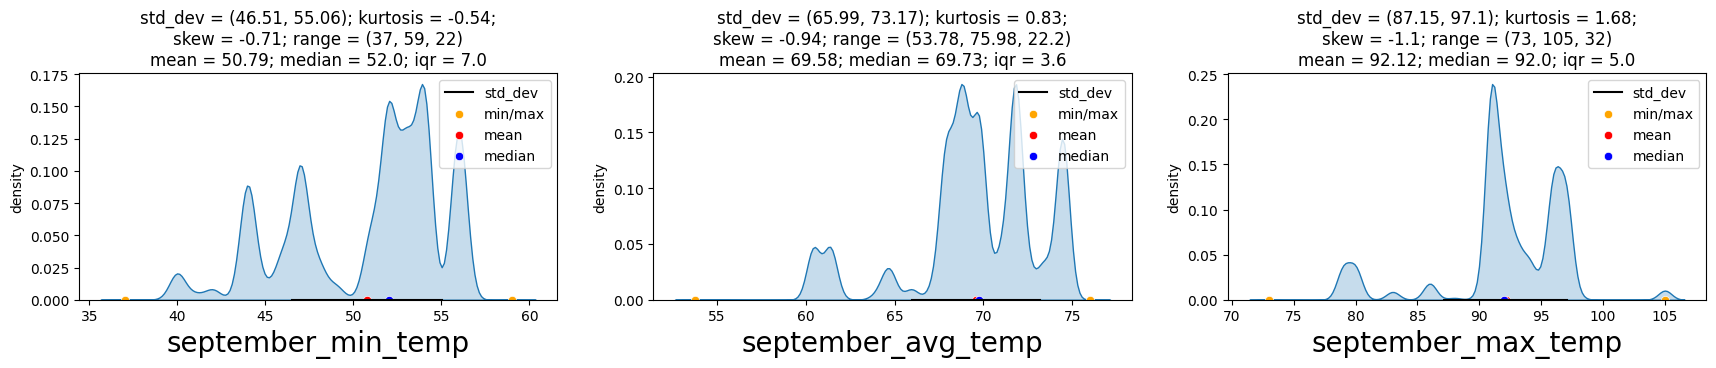

In [60]:
UVA_numeric(train, ['september_min_temp', 'september_avg_temp', 'september_max_temp'])

## **<span style="color:#0000FF;">3.12 October Temperatures</span>**

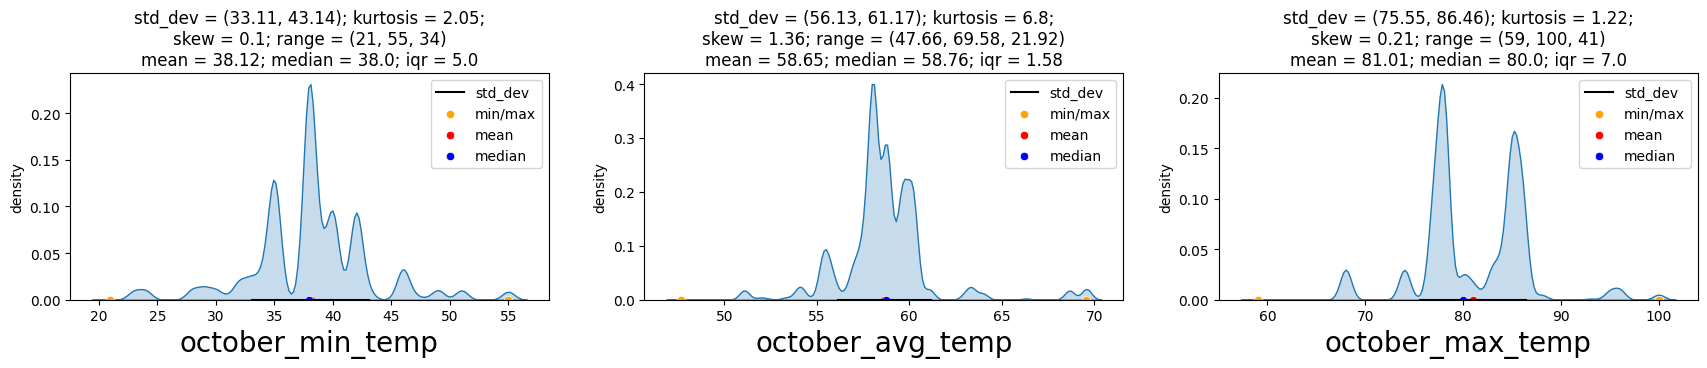

In [61]:
UVA_numeric(train, ['october_min_temp', 'october_avg_temp', 'october_max_temp'])

## **<span style="color:#0000FF;">3.13 November Temperatures</span>**

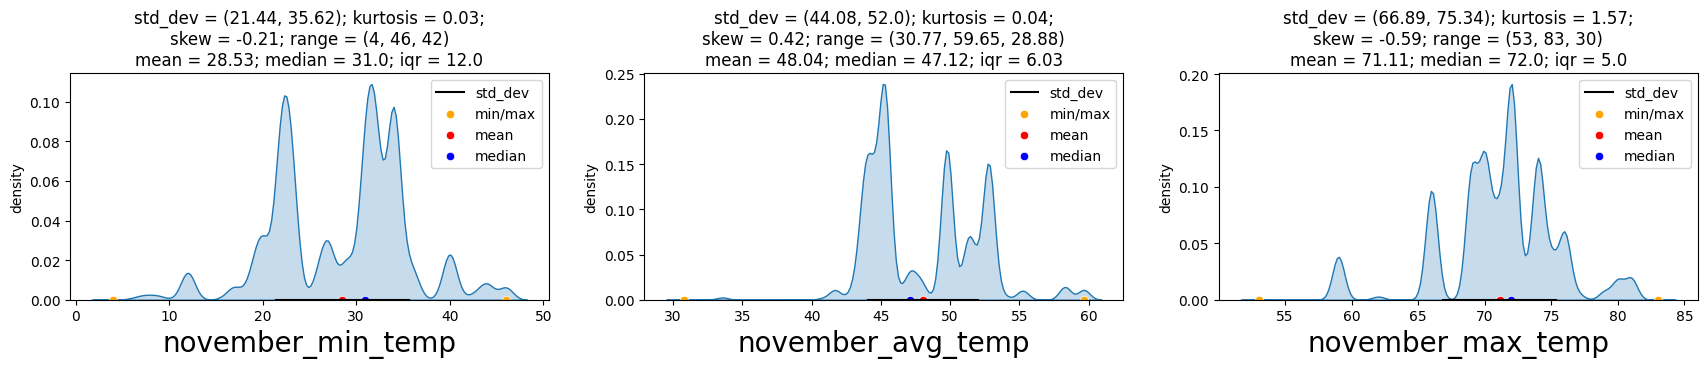

In [62]:
UVA_numeric(train, ['november_min_temp', 'november_avg_temp', 'november_max_temp'])

## **<span style="color:#0000FF;">3.14 December Temperatures</span>**

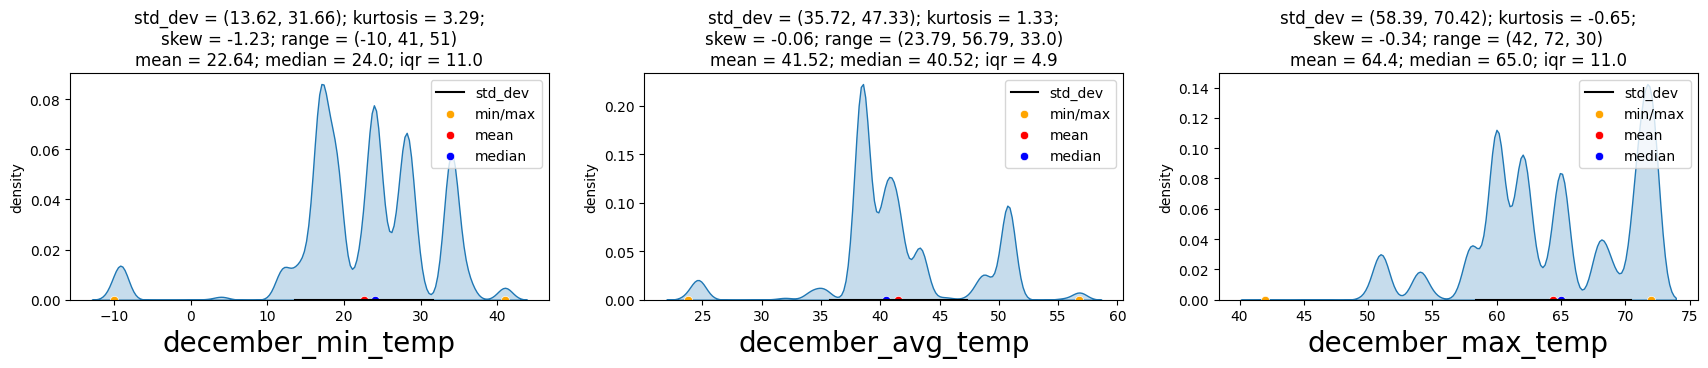

In [63]:
UVA_numeric(train, ['december_min_temp', 'december_avg_temp', 'december_max_temp'])

___
**Notes**
- All the `temperatures` needs to be standardized and there os no more adjustments required for all the temperatures
___

## **<span style="color:#0000FF;">3.15 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches'</span>**

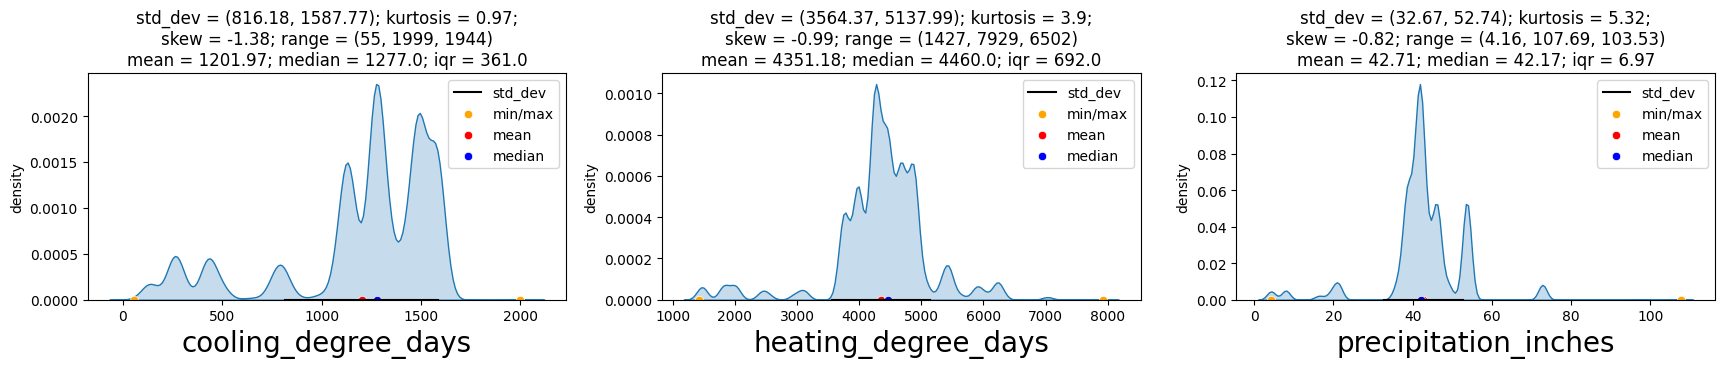

In [64]:
UVA_numeric(train, ['cooling_degree_days', 'heating_degree_days', 'precipitation_inches'])

## **<span style="color:#0000FF;">3.16 'snowfall_inches', 'snowdepth_inches', 'avg_temp'</span>**

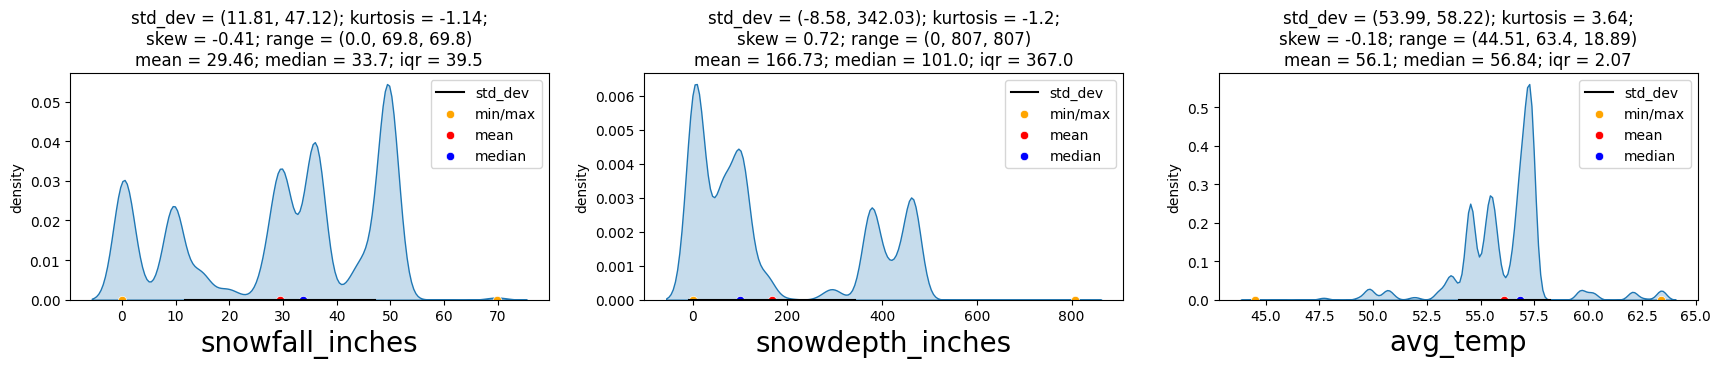

In [65]:
UVA_numeric(train, ['snowfall_inches', 'snowdepth_inches', 'avg_temp'])

In [66]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'energy_star_rating', 'ELEVATION', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdep

## **<span style="color:#0000FF;">3.17 Days Below</span>**

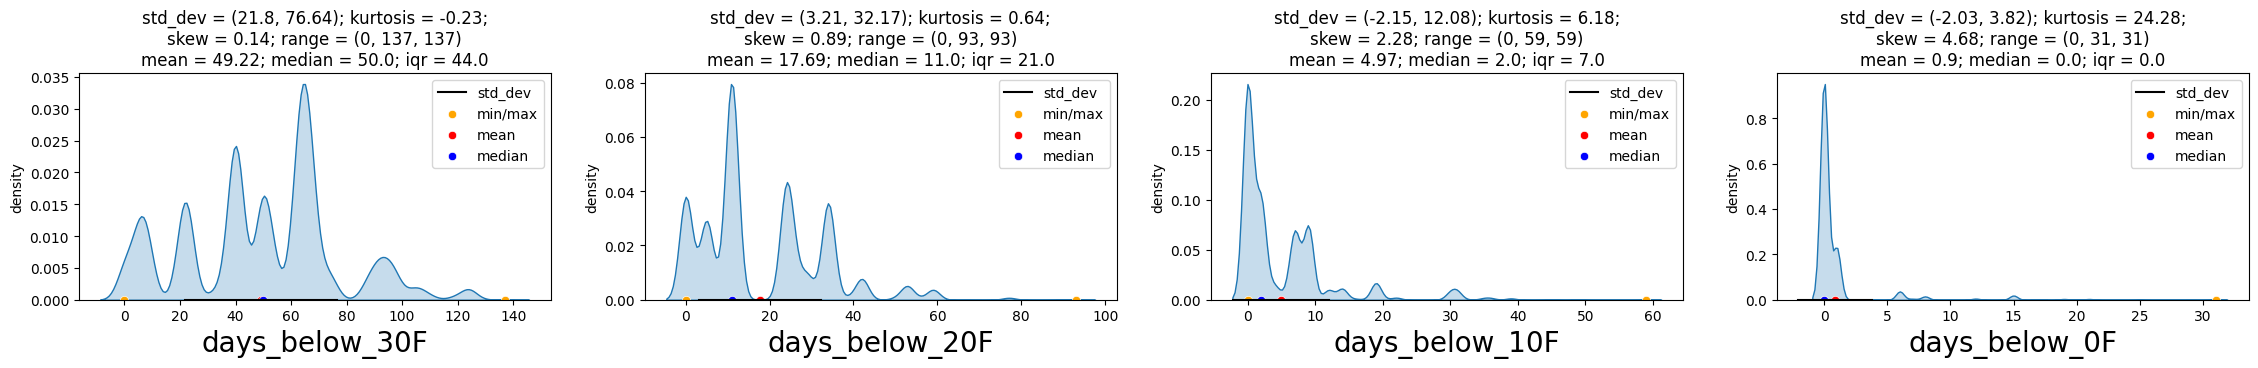

In [67]:
UVA_numeric(train, ['days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F'])

## **<span style="color:#0000FF;">3.18 Days Above</span>**

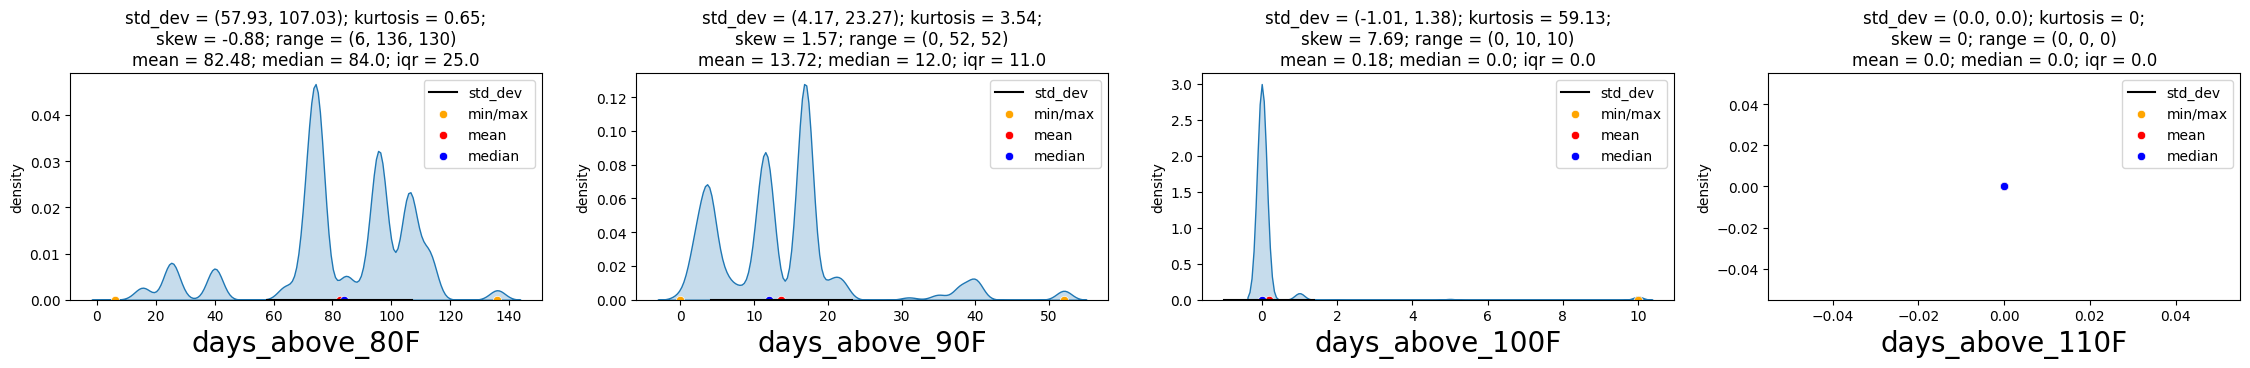

In [68]:
UVA_numeric(train, ['days_above_80F', 'days_above_90F', 'days_above_100F','days_above_110F'])

## **<span style="color:#0000FF;">3.19 Wind</span>**

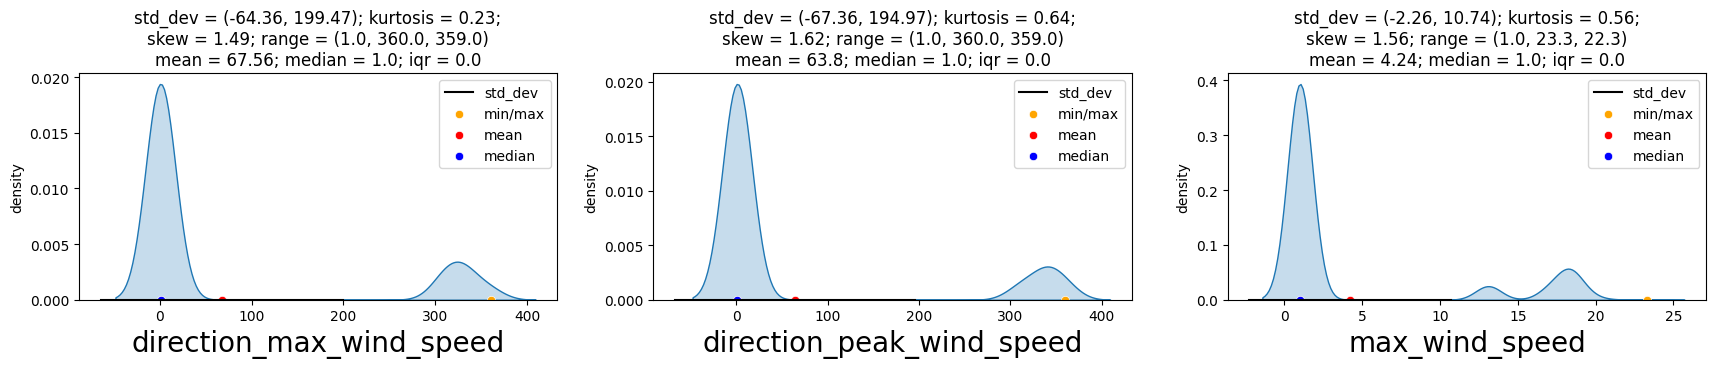

In [69]:
UVA_numeric(train, ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed'])

## **<span style="color:#0000FF;">3.20 Days with fog | Site EUI | Age</span>**

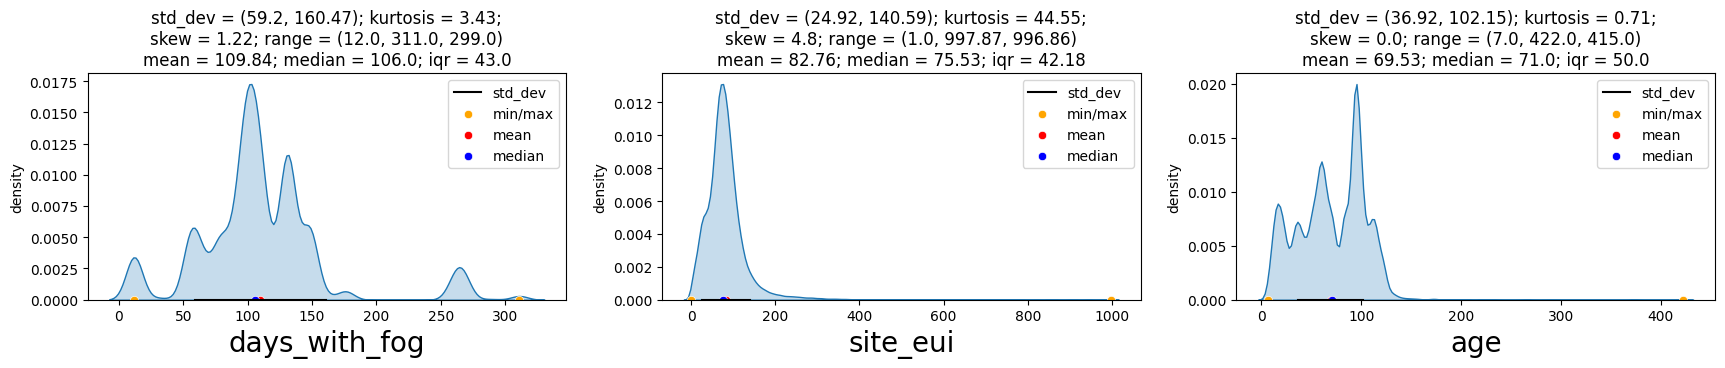

In [70]:
UVA_numeric(train, ['days_with_fog', 'site_eui', 'age'])

___
# **<span style="color:#FF0000;">4- Bivariate Analysis</span>**

## **<span style="color:#FF0000;">4.1 Correlation Matrix</span>**

In [71]:
# Making a seperate DataFrame for categorical and numerical features
categorical_features = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
numerical_features=train.select_dtypes('number').columns
train_cat = train[categorical_features].copy()
train_num = train[numerical_features].copy()
print(train_cat.head())
print(train_num.head())

  Year_Factor State_Factor building_class facility_type
0           1      State_1     Commercial          food
1           1      State_1     Commercial     warehouse
2           1      State_1     Commercial        retail
3           1      State_1     Commercial     education
4           1      State_1     Commercial     warehouse
   floor_area  energy_star_rating  ELEVATION  january_min_temp  \
0     61242.0                11.0        2.4                36   
1    274000.0                45.0        1.8                36   
2    280025.0                97.0        1.8                36   
3     55325.0                46.0        1.8                36   
4     66000.0               100.0        2.4                36   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0              50.5                68                 35          50.589286   
1              50.5                68                 35          50.589286   
2              50.5           

In [72]:
# calculating correlation
correlation = train_num.dropna().corr(method = 'pearson')
correlation.style.background_gradient(cmap="coolwarm")

___
**Notes**
- `days_above_110F:` is an empty column so we are dropping it
___

In [73]:
train['days_above_110F'].isna().sum()

0

In [74]:
print(train['direction_max_wind_speed'].isna().sum())
print(train['direction_max_wind_speed'].value_counts())
print(train['direction_peak_wind_speed'].isna().sum())
print(train['direction_peak_wind_speed'].value_counts())
print(train['max_wind_speed'].isna().sum())
print(train['max_wind_speed'].value_counts())
print(train['days_with_fog'].isna().sum())
print(train['days_with_fog'].value_counts())

39998
1.0      27015
330.0     3006
310.0     2431
360.0      914
350.0      482
320.0       47
280.0       21
Name: direction_max_wind_speed, dtype: int64
40702
1.0      27001
340.0     2929
360.0     1436
310.0     1258
320.0      483
330.0      102
350.0        3
Name: direction_peak_wind_speed, dtype: int64
39998
1.0     27015
18.3     3092
13.0     1258
17.0      931
19.2      694
13.4      483
17.4      316
20.6       80
23.3       47
Name: max_wind_speed, dtype: int64
44515
131.0    5373
99.0     4143
148.0    2613
56.0     2168
106.0    1962
79.0     1786
12.0     1625
110.0    1523
93.0     1410
104.0    1085
267.0     764
111.0     690
116.0     634
261.0     620
88.0      540
63.0      483
65.0      479
73.0      325
176.0     316
101.0     234
311.0     143
87.0       98
161.0      95
114.0      65
31.0       60
125.0      47
58.0       35
289.0      27
113.0      21
120.0      21
37.0        7
86.0        4
51.0        3
Name: days_with_fog, dtype: int64


In [75]:
# Its not pretty and difficult to read
# Lets make a heatmap

def corr_matrix(df, figsize=(20, 15), title='Correlation Matrix'):
    '''
    corr_matrix
    takes the DataFrame, figuresize, and title string as input and plot a Correlation Matrix
    
    '''
    # calculating correlation
    correlation = df.dropna().corr(method = 'pearson')
#     correlation.style.background_gradient(cmap="coolwarm")
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=figsize)                    # Set figure size

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask 
    sns.heatmap(correlation, 
                mask = mask, 
                cmap = cmap, 
                vmax = 1,                                      # Set scale min value
                vmin = -1,                                     # Set scale min value
                center = 0,                                    # Set scale min value
                square = True,                                 # Ensure perfect squares
                linewidths = 1.5,                              # Set linewidth between squares
                cbar_kws = {"shrink": .9},                     # Set size of color bar
                annot = False                                   # Include values within squares
               );

    # plt.xticks(rotation=45)                                    # Rotate x labels
    # plt.yticks(rotation=45)                                    # Rotate y labels
    # plt.xlabel('X Axis Title', size=20)                      # Set x axis title
    # plt.ylabel('Y Axis Title', size=20)                      # Set y axis title
    plt.title(title, size=30, y=1.05);   # Set plot title and position

___
**Notes**
- the correlation matrix is huge lets break it into temperature and no temperature matrix and analyse correlation between temperature first then non-temperature features separately
- from above matrix it is visible that `site_eui` is not correlated with `ELEVATION` and `days_above_110F` 

In [76]:
temperature = ['january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp']

In [77]:
# # calculating correlation
# correlation_temp = train_num[temperature].dropna().corr(method = 'pearson')
# correlation_temp.style.background_gradient(cmap="coolwarm")

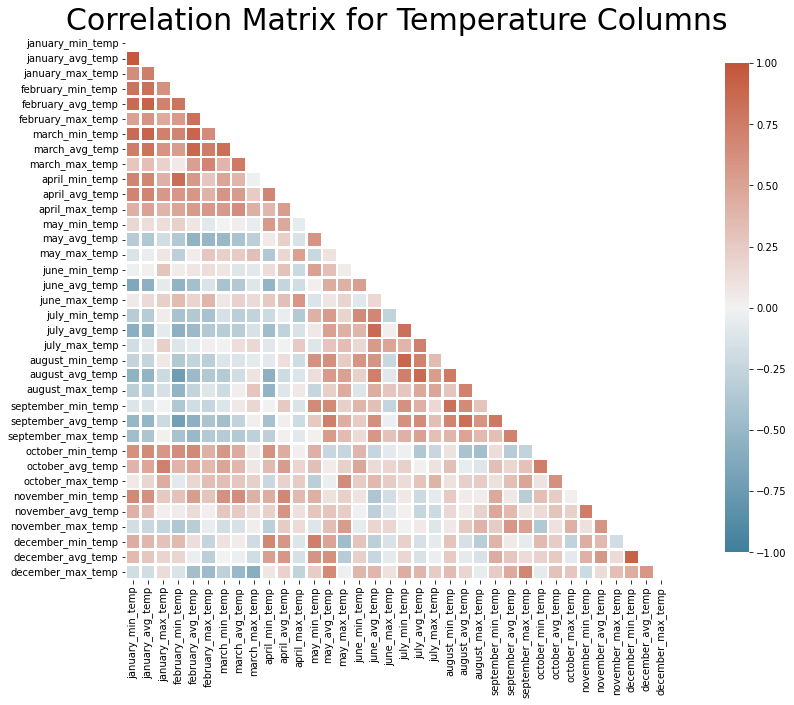

In [78]:
# Correlation plot of just temperatures
corr_matrix(train_num[temperature], figsize = (20, 10), title='Correlation Matrix for Temperature Columns')

___
**Notes**
- `Average temperature`, `Min temperature` and `Max Temperature` for every month are very highly correlated that suggest that they are giving same information, in feature engineering phase we will se what we can do with those features maybe we can make a new column which gives the change i-e `max-min` temperature and remove the `max` and `min` temperatures columns or we can just keep the `average` column and drop both `max` and `min`
___

In [79]:
non_temp = ['floor_area',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'age',
 'site_eui']

In [80]:
# # calculating correlation
# correlation_non_temp = train_num[non_temp].dropna().corr(method = 'pearson')
# correlation_non_temp.style.background_gradient(cmap="coolwarm")

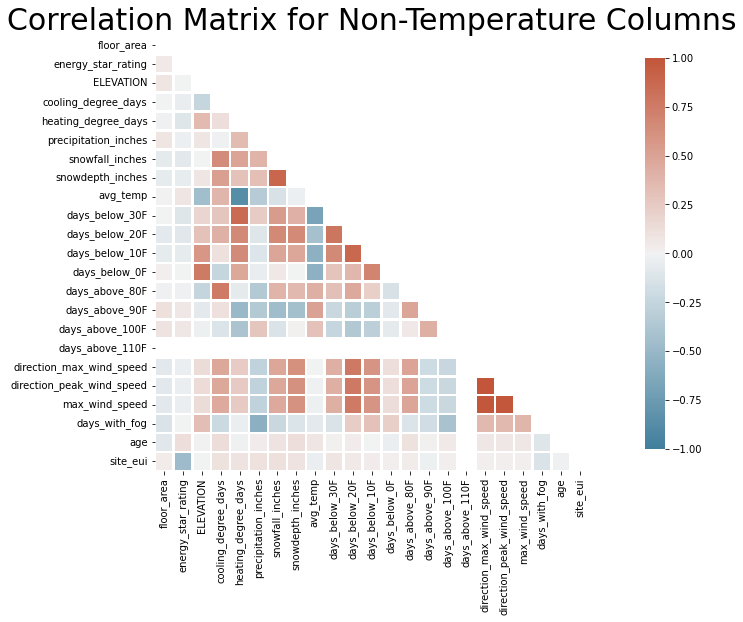

In [81]:
# Correlation Matrix for Non-Temperature Columns
corr_matrix(train_num[non_temp], figsize = (20,8), title = 'Correlation Matrix for Non-Temperature Columns')

In [82]:
# sns.pairplot(train_num.dropna().sample(200))

In [83]:
train_temperature = train_num[temperature].copy()
train_wo_temperature = train_num.drop(temperature, axis = 1)

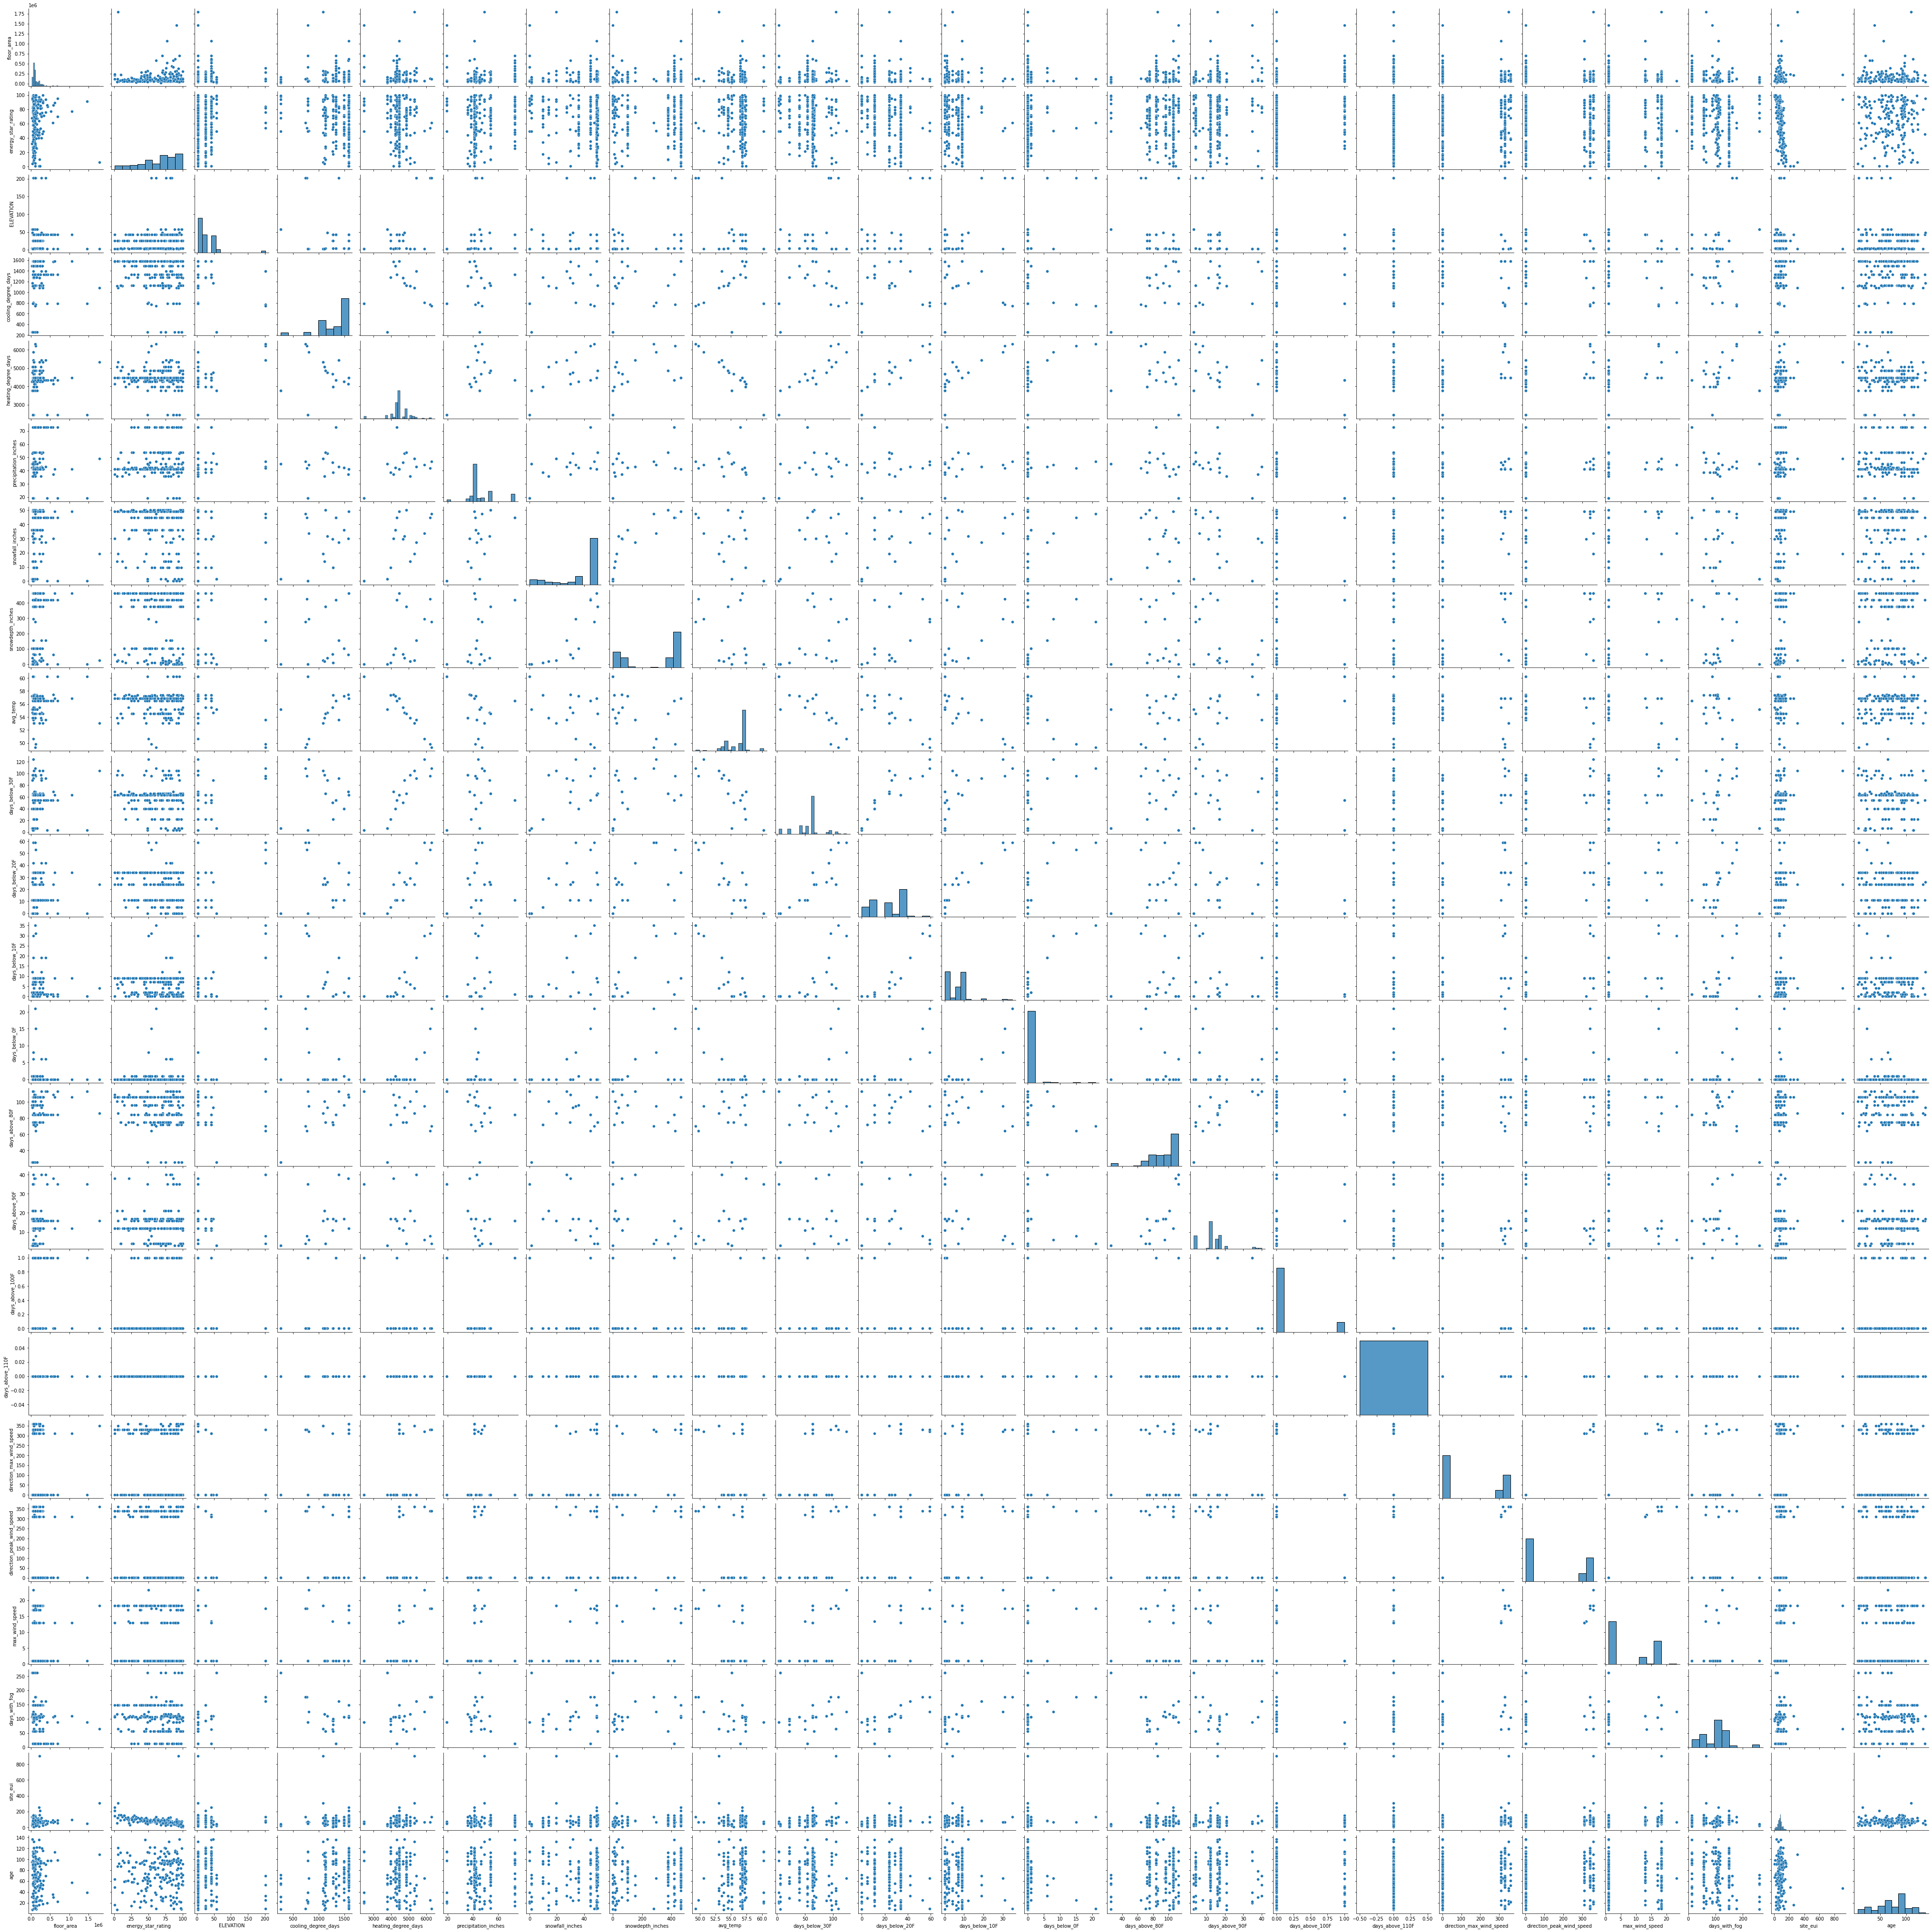

In [84]:
sns.pairplot(train_wo_temperature.dropna().sample(200))

In [ ]:
sns.pairplot(train_temperature.dropna().sample(200))

___
## Hypothesis Testing

For a quick refresher on hypothesis testing refer to thin [Link](https://medium.com/analytics-vihttps://medium.com/analytics-vidhya/everything-you-should-know-about-p-value-from-scratch-for-data-science-f3c0bfa3c4cc)

We will be performing the hypothesis testing as we go along plotting the graphs. This will save a lot of time in the long run. For this we will be making three functions.

Function for 2sample Z-Test
Function for 2 sample T-Test
Function for plotting which uses the above mentioned two functions.

In [86]:
# def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
#   '''
#   takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
#   '''
#   from numpy import sqrt, abs, round
#   from scipy.stats import norm
#   ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
#   z = (X1 - X2)/ovr_sigma
#   pval = 2*(1 - norm.cdf(abs(z)))
#   return pval


In [87]:
# def TwoSampT(X1, X2, sd1, sd2, n1, n2):
#   '''
#   takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
#   '''
#   from numpy import sqrt, abs, round
#   from scipy.stats import t as t_dist
#   ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
#   t = (X1 - X2)/ovr_sd
#   df = n1+n2-2
#   pval = 2*(1 - t_dist.cdf(abs(t),df))
#   return pval

In [88]:
# #calculating descriptives
#   n1, n2 = x1.shape[0], x2.shape[0]
#   m1, m2 = x1.mean(), x2.mean()
#   std1, std2 = x1.std(), x2.std()
  
#   #calculating p-values
#   t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
#   z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

## Z-Test
The Z test entails calculating the P-value and then determining how close the calculated P value is to the significance value that is taken into account. The significance level is usually about 0.05. The P value is a representation of the identified probability value. The probability value indicates the likelihood that the assumed hypothesis is a null hypothesis or an alternative hypothesis. As a result of the P value, the validity of the hypothesis assumption is established.

For more details read the [documentation](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [89]:
# hypothesis for test:  column 1 value 

from statsmodels.stats import weightstats as stests
train[["floor_area","site_eui"]].describe()

floor_area      site_eui
count  7.391400e+04  73914.000000
mean   1.660749e+05     82.755150
std    2.440478e+05     57.838325
min    1.800000e+03      1.001169
25%    6.279000e+04     55.157951
50%    9.200000e+04     75.534998
75%    1.662600e+05     97.333333
max    6.353396e+06    997.866120

___
### Assumption
`Null Hypothesis:`Is `floor_area` significantly different than `site_eui`?
`Alternate Hypothesis:` `floor_area` is not significantly different than `site_eui`

In [90]:
ztest, probability_value = stests.ztest(train["floor_area"], x2=train['site_eui'], value=train['floor_area'].mean()-train['site_eui'].mean())
print(float(probability_value))
if probability_value <= 0.05: # set baseline
    print("Reject H0.")
else:
    print("Accept H0.")

1.0
Accept H0.


In [91]:
probability_value

1.0

In [92]:
ztest

0.0

## T-Test
`T- Test :`- A t-test is an inferential statistic that is used to see if there is a significant difference between the means of two groups that are similar in some ways. It's most commonly employed when the data sets, such as those obtained by flipping a coin 100 times, follow a normal distribution and have unknown variances. The T test is a hypothesis testing tool that allows you to test a population-based assumption.

For more details checkout the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

___
**Assumption**  
`Null Hypothesis:`Is `floor_area` significantly different than `site_eui`? 

`Alternate Hypothesis:` `floor_area` is not significantly different than `site_eui`

In [93]:
from scipy import stats
variable_1 = train["floor_area"]
variable_2 = train['site_eui']

t_value, p = stats.ttest_ind(variable_1, variable_2)
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p)

alpha = 0.05
if p <= alpha:
    print("Reject H0.")
else:
    print("Accept H0.")


Test statistic is 184.916616
p-value for two tailed test is 0.000000
Reject H0.


___
**Notes**

**`How do you know if its t test or Z-test?`**

If the population standard deviation is known or given, a **z-test** is always appropriate. If the population standard deviation is unknown, look to the sample size. For samples of size 30 or less, use a **t-test**. For larger samples, a **z-test** will suffice

___
## Chi-Square Test

`What is Chi-Square Test?`
Chi-Square test is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data. The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them. [Ref](https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/)



The Null hypothesis will be that the variables being compared are independent and our alternate hypothesis will be that the variables are independent.

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

In [94]:
# # Making a seperate DataFrame for categorical and numerical features
# categorical_features = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
# numerical_features=train.select_dtypes('number').columns
# numerical_features

In [95]:
# from scipy.stats import chi2_contingency

# # initialize the values in this matrix with 0
# resultant = pd.DataFrame(data=[(0 for i in range(len(train[numerical_features]))) for i in range(len(train[numerical_features"]))], 
#                          columns=list(train[numerical_features]))
# resultant.set_index(pd.Index(list(train[numerical_features])), inplace = True)

# # Finding p_value for all columns and putting them in the resultant matrix
# for i in list(train[numerical_features]):
#     for j in list(train[numerical_features]):
#         if i != j:
#             chi2_val, p_val = chi2(np.array(train[i]).reshape(-1, 1), np.array(train[j]).reshape(-1, 1))
#             resultant.loc[i,j] = p_val
# print(resultant)


In [96]:
# Making a seperate DataFrame for categorical and numerical features
categorical_features = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
numerical_features=train.select_dtypes('number').columns

___
## Kruskal-Wallis H-Test (non-parametric Test)

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

In [97]:
from scipy import stats
stats.kruskal(train['floor_area'], train['site_eui'])

KruskalResult(statistic=110870.25333985742, pvalue=0.0)

## Scatter Plots

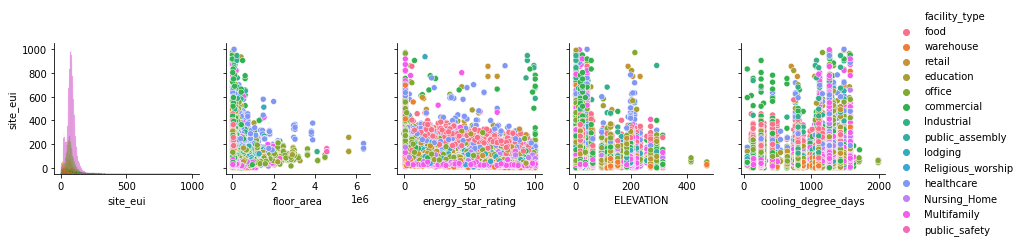

In [99]:
x_vars = ["site_eui", "floor_area", "energy_star_rating", "ELEVATION", 'cooling_degree_days']
y_vars = ["site_eui"]
g = sns.PairGrid(train, hue = 'facility_type', x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

EDA Analysis was done in tableau too, here are the details

https://public.tableau.com/app/profile/komal.malani/viz/MitigateGHGEmission_EnergyConsumptionBuilding/EDA?publish=yes
    